## seaborn

In [8]:
import anndata as ad
import numpy as np

In [9]:
import sys
import os

# Define the path to the main folder
main_folder = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/main_semi"

# Add it to sys.path
sys.path.append(main_folder)

import LCL_eval

In [10]:
import os
import numpy as np
import anndata as ad
import pandas as pd

# — adjust these two paths to your local setup —
TRAIN_ADATA = ad.read_h5ad('/Users/apple/Desktop/KB/data/Shaffer_cancer/shaffer_train.h5ad')
TEST_ADATA  = ad.read_h5ad('/Users/apple/Desktop/KB/data/Shaffer_cancer/shaffer_test.h5ad')


In [13]:
input_dir = "/Users/apple/Desktop/KB/data/feat_LCL_2025/shaffer_cancer"

train_semi_01 = np.load(input_dir+'/feat_shaffer_lambda01_unlab5_bs100/scBaseEncoderFeat_Z_bs110_tau0.5.npy')
test_semi_01 = np.load(input_dir+'/feat_shaffer_lambda01_unlab5_bs100/test_embedding.npy')

train_semi_05 = np.load(input_dir+'/feat_shaffer_lambda05_unlab5_bs100/scBaseEncoderFeat_Z_bs110_tau0.5.npy')
test_semi_05 = np.load(input_dir+'/feat_shaffer_lambda05_unlab5_bs100/test_embedding.npy')

train_semi_1 = np.load(input_dir+'/feat_shaffer_lambda1_unlab5_bs100/scBaseEncoderFeat_Z_bs100_tau0.5.npy')
test_semi_1 = np.load(input_dir+'/feat_shaffer_lambda1_unlab5_bs100/test_embedding.npy')

train_semi_01_testPen = np.load(input_dir+'/feat_shaffer_lambda01_unlab5_bs110_testAsPenalty/scBaseEncoderFeat_Z_bs110_tau0.5.npy')
test_semi_01_testPen = np.load(input_dir+'/feat_shaffer_lambda01_unlab5_bs110_testAsPenalty/test_embedding.npy')

In [5]:
ev = LCL_eval.Eval(train_semi_01, TRAIN_ADATA)
tr_acc = ev.KNN_train(n_neighbors=5)
te_acc = ev.KNN_test(test_semi_01, TEST_ADATA, n_neighbors=5)

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


KNN classifier training accuracy: 89.91%
KNN classifier testing accuracy: 25.34%


In [6]:
ev = LCL_eval.Eval(train_semi_01_testPen, TRAIN_ADATA)
tr_acc = ev.KNN_train(n_neighbors=5)
te_acc = ev.KNN_test(test_semi_01__testPen, TEST_ADATA, n_neighbors=5)

KNN classifier training accuracy: 88.60%
KNN classifier testing accuracy: 17.61%


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
test_labels = TEST_ADATA.obs["clone_id"].to_numpy()
knn_test_model = KNeighborsClassifier(n_neighbors=5)
labels = TRAIN_ADATA.obs["clone_id"].to_numpy()
knn_test_model.fit(train_semi_01,labels)

y_pred = knn_test_model.predict(test_semi_01)
accuracy = accuracy_score(test_labels, y_pred)

In [14]:
accuracy

0.2533783783783784

In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.0000    0.0000    0.0000         2
           2     0.0000    0.0000    0.0000         7
           5     0.3333    0.2500    0.2857         4
           6     0.0000    0.0000    0.0000         4
           7     0.0000    0.0000    0.0000         1
           8     0.0000    0.0000    0.0000         2
           9     0.0000    0.0000    0.0000         2
          10     0.0000    0.0000    0.0000         2
          11     0.0000    0.0000    0.0000         2
          12     0.0000    0.0000    0.0000         2
          14     0.0000    0.0000    0.0000         2
          16     0.0000    0.0000    0.0000         2
          19     0.0000    0.0000    0.0000         2
          20     0.0000    0.0000    0.0000         1
          21     0.0000    0.0000    0.0000         2
          22     0.2258    0.3818    0.2838        55
          23     0.0000    

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/s

In [26]:

vc = pd.Series(y_pred).value_counts()
print(vc)

389    119
349    108
504    104
223     95
127     94
      ... 
413      1
408      1
427      1
84       1
442      1
Name: count, Length: 166, dtype: int64


In [18]:
len(TEST_ADATA.obs["clone_id"].unique()), len(TRAIN_ADATA.obs["clone_id"].unique())


(376, 558)

In [16]:
ev = LCL_eval.Eval(train_semi_05, TRAIN_ADATA)
tr_acc = ev.KNN_train(n_neighbors=5)
te_acc = ev.KNN_test(test_semi_05, TEST_ADATA, n_neighbors=5)

KNN classifier training accuracy: 24.39%
KNN classifier testing accuracy: 12.04%


In [17]:
ev = LCL_eval.Eval(train_semi_1, TRAIN_ADATA)
tr_acc = ev.KNN_train(n_neighbors=5)
te_acc = ev.KNN_test(test_semi_1, TEST_ADATA, n_neighbors=5)

KNN classifier training accuracy: 19.02%
KNN classifier testing accuracy: 13.18%


In [14]:

adata_train = ad.read_h5ad('/Users/apple/Desktop/KB/data/Shaffer_cancer/shaffer_train.h5ad')
adata_test  = ad.read_h5ad('/Users/apple/Desktop/KB/data/Shaffer_cancer/shaffer_test.h5ad')

input_dir = "/Users/apple/Desktop/KB/data/feat_LCL_2025/shaffer_cancer"

train_semi_10 = np.load(input_dir+'/feat_shaffer_lambda01_unlab5_bs110_testAsPenalty/scBaseEncoderFeat_Z_bs110_tau0.5.npy')
test_semi_10 = np.load(input_dir+'/feat_shaffer_lambda01_unlab5_bs110_testAsPenalty/test_embedding.npy')


In [15]:
adata_train.obsm["LCL_embedding_semi_10"] = train_semi_10
adata_test.obsm["LCL_embedding_semi_10"] = test_semi_10

adata_train.obs["dataset"] = "train"
adata_test.obs["dataset"] = "test"

adata = ad.concat([adata_train, adata_test], axis=0, join='outer')

In [16]:
import umap

reducer = umap.UMAP()

embedding_umap = reducer.fit_transform(adata.obsm["LCL_embedding_semi_10"])

adata.obsm["X_umap"] = embedding_umap

In [17]:
import pandas as pd

# Count number of cells per lineage
clone_counts = adata.obs["clone_id"].value_counts()

# Get the top 5 largest lineages
top_5_clones = clone_counts.index[:5]

# Assign 'Other' to all lineages except the top 5
adata.obs["clone_group"] = adata.obs["clone_id"].apply(lambda x: x if x in top_5_clones else "Other")

# Convert to categorical
adata.obs["clone_group"] = adata.obs["clone_group"].astype("category")

# Print for verification
print(adata.obs["clone_group"].value_counts())

clone_group
Other    19276
349       1041
389       1036
527        672
22         548
447        451
Name: count, dtype: int64


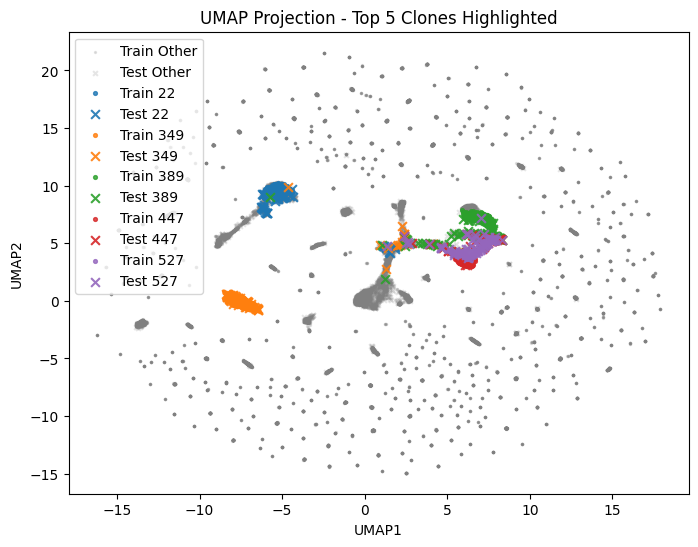

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_umap(adata, colormap="tab10"):
    """
    Plots UMAP with:
    - Top 5 clones in distinct colors (plotted on top)
    - Other clones in gray with lower opacity
    - Train cells as dots, Test cells as crosses
    - Larger marker size for top 5 clones
    """
    umap_coords = adata.obsm["X_umap"]

    # Extract train and test indices
    train_idx = adata.obs["dataset"] == "train"
    test_idx = adata.obs["dataset"] == "test"

    # Get unique clone groups
    unique_clones = adata.obs["clone_group"].cat.categories

    # Define a colormap for the top 5 clones, others in gray
    colors = plt.get_cmap(colormap)(range(len(unique_clones) - 1))  # Leave space for gray
    color_map = dict(zip(unique_clones[:-1], colors))  # Map top 5 clones
    color_map["Other"] = "gray"  # Set 'Other' to gray

    plt.figure(figsize=(8, 6))

    # **Step 1**: Plot "Other" cells first (background with low opacity)
    idx_train_other = (adata.obs["clone_group"] == "Other") & train_idx
    idx_test_other = (adata.obs["clone_group"] == "Other") & test_idx

    plt.scatter(umap_coords[idx_train_other, 0], umap_coords[idx_train_other, 1], 
                color=color_map["Other"], s=8, marker=".", alpha=0.2, label="Train Other")  # Lower opacity

    plt.scatter(umap_coords[idx_test_other, 0], umap_coords[idx_test_other, 1], 
                color=color_map["Other"], s=12, marker="x", alpha=0.2, label="Test Other")  # Lower opacity

    # **Step 2**: Plot top 5 clones on top (larger size)
    for clone in unique_clones[:-1]:  # Skip "Other"
        idx_train = (adata.obs["clone_group"] == clone) & train_idx
        idx_test = (adata.obs["clone_group"] == clone) & test_idx

        # Train: Dots
        plt.scatter(umap_coords[idx_train, 0], umap_coords[idx_train, 1], 
                    color=color_map[clone], s=30, marker=".", alpha=0.8, label=f"Train {clone}")  # Bigger size

        # Test: Crosses
        plt.scatter(umap_coords[idx_test, 0], umap_coords[idx_test, 1], 
                    color=color_map[clone], s=40, marker="x", alpha=0.9, label=f"Test {clone}")  # Bigger size

    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title("UMAP Projection - Top 5 Clones Highlighted")
    plt.legend()
    plt.show()

# Run the function to plot
plot_umap(adata)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_umap_with_lineages(adata, n_top_lineages=5, colormap="tab10"):
    """
    Plots UMAP from `adata.obsm["X_umap"]` with:
    - Top N clones in distinct colors (plotted on top)
    - Other clones in gray with lower opacity
    - Train cells as dots, Test cells as crosses
    
    Parameters:
    - adata (AnnData): AnnData object with precomputed UMAP in `.obsm["X_umap"]`
    - n_top_lineages (int): Number of largest lineages to highlight in the plot
    - colormap (str): Matplotlib colormap for the distinct top N lineages
    
    Output:
    - A UMAP scatter plot (does NOT modify `adata`)
    """

    ### **1️⃣ Check If Required Fields Exist**
    if "X_umap" not in adata.obsm:
        raise ValueError("UMAP coordinates missing! Ensure `adata.obsm['X_umap']` is computed.")
    
    if "LCL_embedding_semi_10" not in adata.obsm:
        raise ValueError("Contrastive learning embeddings missing! Ensure `adata.obsm['LCL_embedding_dim10']` exists.")
    
    if "clone_id" not in adata.obs:
        raise ValueError("Clone ID column missing! Ensure `adata.obs['clone_id']` exists.")
    
    if "dataset" not in adata.obs:
        raise ValueError("Dataset column missing! Ensure `adata.obs['dataset']` exists with 'train' and 'test' values.")

    ### **2️⃣ Identify the Top N Largest Lineages**
    print(f"Identifying the top {n_top_lineages} largest lineages...")
    clone_counts = adata.obs["clone_id"].value_counts()
    top_n_clones = clone_counts.index[:n_top_lineages]

    # Assign "Other" to all but the top N lineages
    adata.obs["clone_group"] = adata.obs["clone_id"].apply(lambda x: x if x in top_n_clones else "Other")
    
    # Convert to categorical for easy plotting
    adata.obs["clone_group"] = adata.obs["clone_group"].astype("category")

    ### **3️⃣ Plot UMAP with Custom Formatting**
    print("Plotting UMAP with lineage-specific colors and train/test markers...")

    umap_coords = adata.obsm["X_umap"]
    train_idx = adata.obs["dataset"] == "train"
    test_idx = adata.obs["dataset"] == "test"
    
    unique_clones = adata.obs["clone_group"].cat.categories

    # Define a colormap for the top N clones, others in gray
    colors = plt.get_cmap(colormap)(range(len(unique_clones) - 1))  # Leave space for gray
    color_map = dict(zip(unique_clones[:-1], colors))  # Map top N clones
    color_map["Other"] = "gray"  # Set 'Other' to gray

    plt.figure(figsize=(8, 6))

    # **Step 1**: Plot "Other" cells first (background with low opacity)
    idx_train_other = (adata.obs["clone_group"] == "Other") & train_idx
    idx_test_other = (adata.obs["clone_group"] == "Other") & test_idx

    plt.scatter(umap_coords[idx_train_other, 0], umap_coords[idx_train_other, 1], 
                color=color_map["Other"], s=8, marker=".", alpha=0.2, label="Train Other")

    plt.scatter(umap_coords[idx_test_other, 0], umap_coords[idx_test_other, 1], 
                color=color_map["Other"], s=8, marker="x", alpha=0.2, label="Test Other")

    # **Step 2**: Plot top N clones on top (larger size)
    for clone in unique_clones[:-1]:  # Skip "Other"
        idx_train = (adata.obs["clone_group"] == clone) & train_idx
        idx_test = (adata.obs["clone_group"] == clone) & test_idx

        # Train: Dots
        plt.scatter(umap_coords[idx_train, 0], umap_coords[idx_train, 1], 
                    color=color_map[clone], s=40, marker=".", alpha=0.8, label=f"Train {clone}")

        # Test: Crosses
        plt.scatter(umap_coords[idx_test, 0], umap_coords[idx_test, 1], 
                    color=color_map[clone], s=40, marker="x", alpha=1, label=f"Test {clone}")

    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title(f"UMAP Projection - Top {n_top_lineages} Clones Highlighted")
    plt.legend()
    plt.show()

Identifying the top 1 largest lineages...
Plotting UMAP with lineage-specific colors and train/test markers...


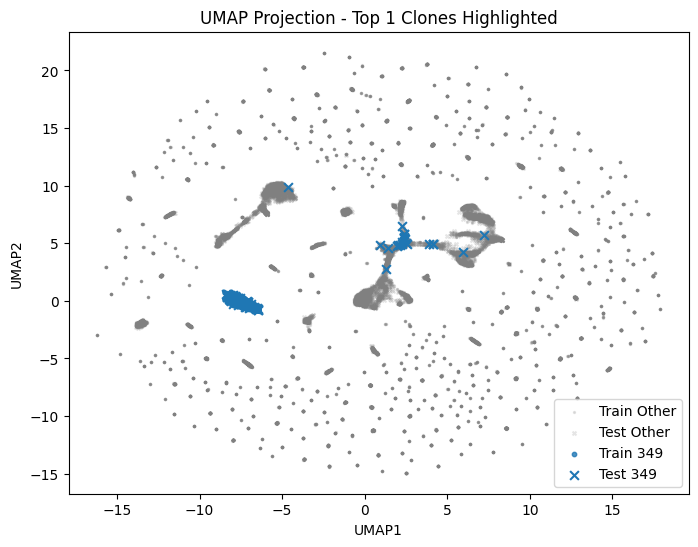

In [21]:
plot_umap_with_lineages(adata, n_top_lineages=1)

In [24]:
adata_train.obs.shape

(20656, 19)

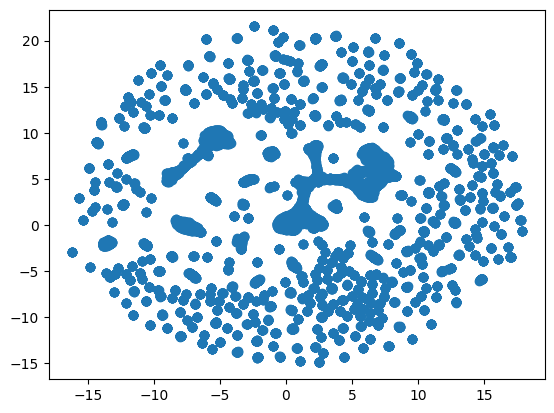

In [20]:
import matplotlib.pyplot as plt
plt.scatter(embedding_umap[:,0],embedding_umap[:,1])

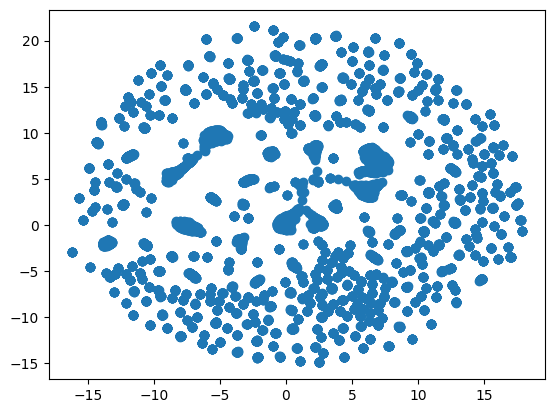

In [25]:
plt.scatter(embedding_umap[:20656,0],embedding_umap[:20656,1])

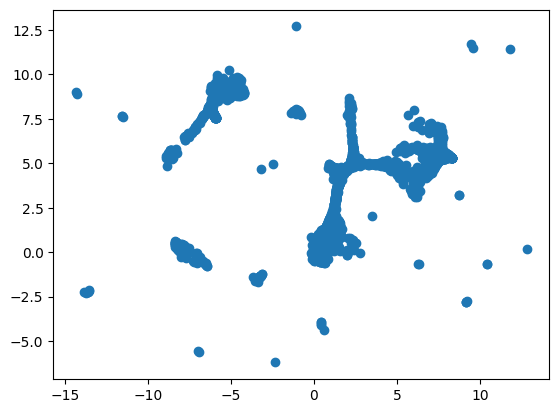

In [26]:
plt.scatter(embedding_umap[20656:,0],embedding_umap[20656:,1])

In [22]:
len(TRAIN_ADATA.obs["clone_id"].unique())

558

In [ ]:
code2name = {
    0: "cis",
    1: "cistocis",
    2: "cistococl2",
    3: "cistodabtram",
    4: "cocl2",
    5: "cocl2tocis",
    6: "cocl2tococl2",
    7: "cocl2todobtram",
    8: "dabtram",
    9: "dabtramtocis",
   10: "dabtramtococl2",
   11: "dabtramtodabtram",
}


TRAIN_ADATA.obs["OG_condition_name"] = TRAIN_ADATA.obs["OG_condition"].map(code2name)
TEST_ADATA.obs["OG_condition_name"] = TEST_ADATA.obs["OG_condition"].map(code2name)



In [ ]:
color_map = {
    "cis":               "#EE8632",
    "cistocis":          "#F3C866",
    "cistococl2":        "#F5891F",
    "cistodabtram":      "#D1392C",
    "cocl2":             "#67AD57",
    "cocl2tocis":        "#A6D785",
    "cocl2tococl2":      "#98E29A",
    "cocl2tocabtram":    "#1E4539",
    "dabtram":           "#8E529F",
    "dabtramcocis":      "#B59EC9",
    "dabtramcocl2":      "#A163C0",
    "dabtramtodabtram":  "#6B2E70",
}



cistodabtram_CCCGGAAAGCAACTCT-1    cistodabtram
cistodabtram_CATTCATAGCTAATGA-1    cistodabtram
cistodabtram_CCTCAGTTCCTCTTTC-1    cistodabtram
cis_ACGATGTGTCGCGTTG-1                      cis
cistodabtram_TTCATGTAGGGAGATA-1    cistodabtram
                                       ...     
cocl2_TACGCTCAGCATGCAG-1                  cocl2
cocl2tocis_AAACCCACAATCCTAG-1        cocl2tocis
cocl2tocis_AGTGACTCAACCCGCA-1        cocl2tocis
cocl2tocis_GTGGGAATCTACAGGT-1        cocl2tocis
cocl2tocis_TACACCCAGACGGTTG-1        cocl2tocis
Name: OG_condition_name, Length: 20656, dtype: object

In [56]:
import umap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 1) Apply seaborn’s theme to matplotlib
plt.style.use("seaborn-v0_8-whitegrid")

# 2) compute a 2D UMAP
reducer = umap.UMAP(random_state=42)
embedding_2d = reducer.fit_transform(train_semi_05)

# 3) pull your labels
labels = TRAIN_ADATA.obs["OG_condition_name"].values

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


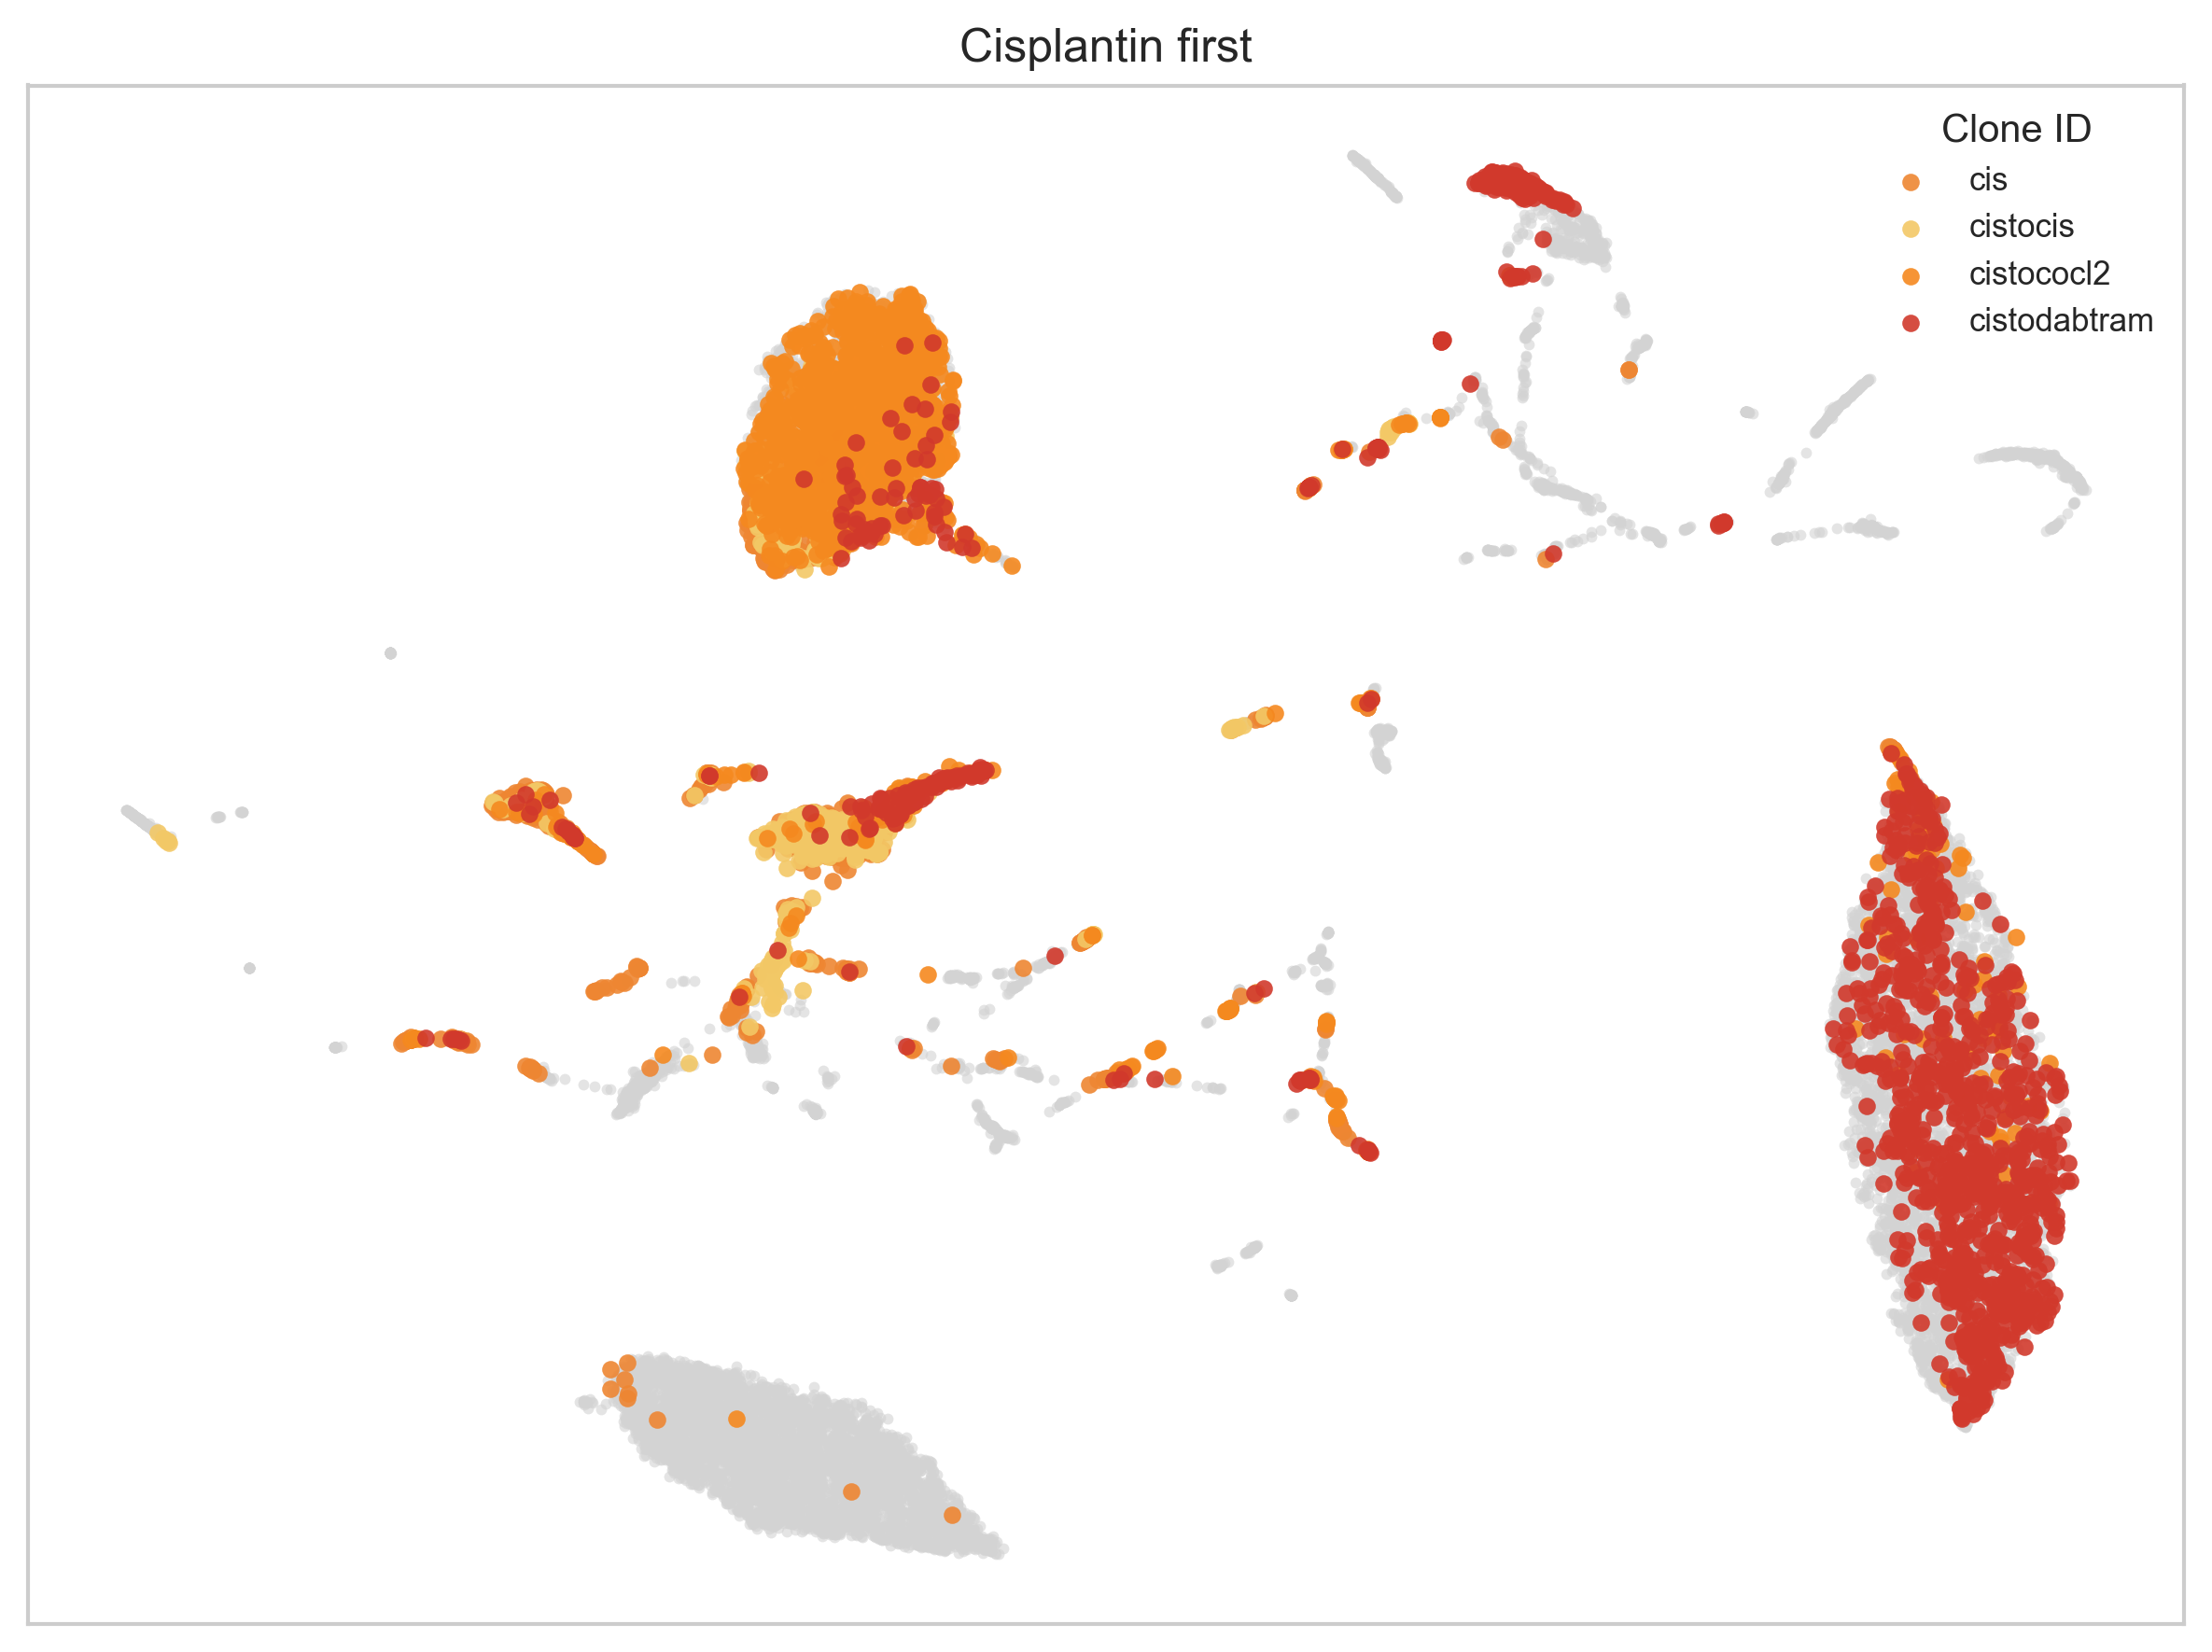

In [57]:

# 4) define the colors you want on top
color_map = {
    "cis":           "#EE8632",
    "cistocis":      "#F3C866",
    "cistococl2":    "#F5891F",
    "cistodabtram":  "#D1392C",
}
default_color = "lightgray"

# 5) make boolean masks
is_grey    = [l not in color_map for l in labels]
is_colored = [l in color_map     for l in labels]

# 6) plot
plt.figure(figsize=(8,6), dpi=300)
plt.grid(False)
plt.xticks([]); plt.yticks([])
plt.title("Cisplantin first")

# 6a) grey background
plt.scatter(
    embedding_2d[is_grey,0],
    embedding_2d[is_grey,1],
    c=default_color,
    s=8,
    alpha=0.6,
    linewidth=0,
    label="_nolegend_"
)

# 6b) overlay each of your four lineages
for cid, col in color_map.items():
    mask = labels == cid
    plt.scatter(
        embedding_2d[mask,0],
        embedding_2d[mask,1],
        c=col,
        s=20,
        alpha=0.9,
        linewidth=0,
        label=cid
    )

# 7) legend
plt.legend(
    title="Clone ID",
    loc="upper right",
    frameon=False,
    fontsize="small"
)
plt.tight_layout()
plt.savefig("Cisplantin_first.pdf", format="pdf", bbox_inches="tight")
plt.show()

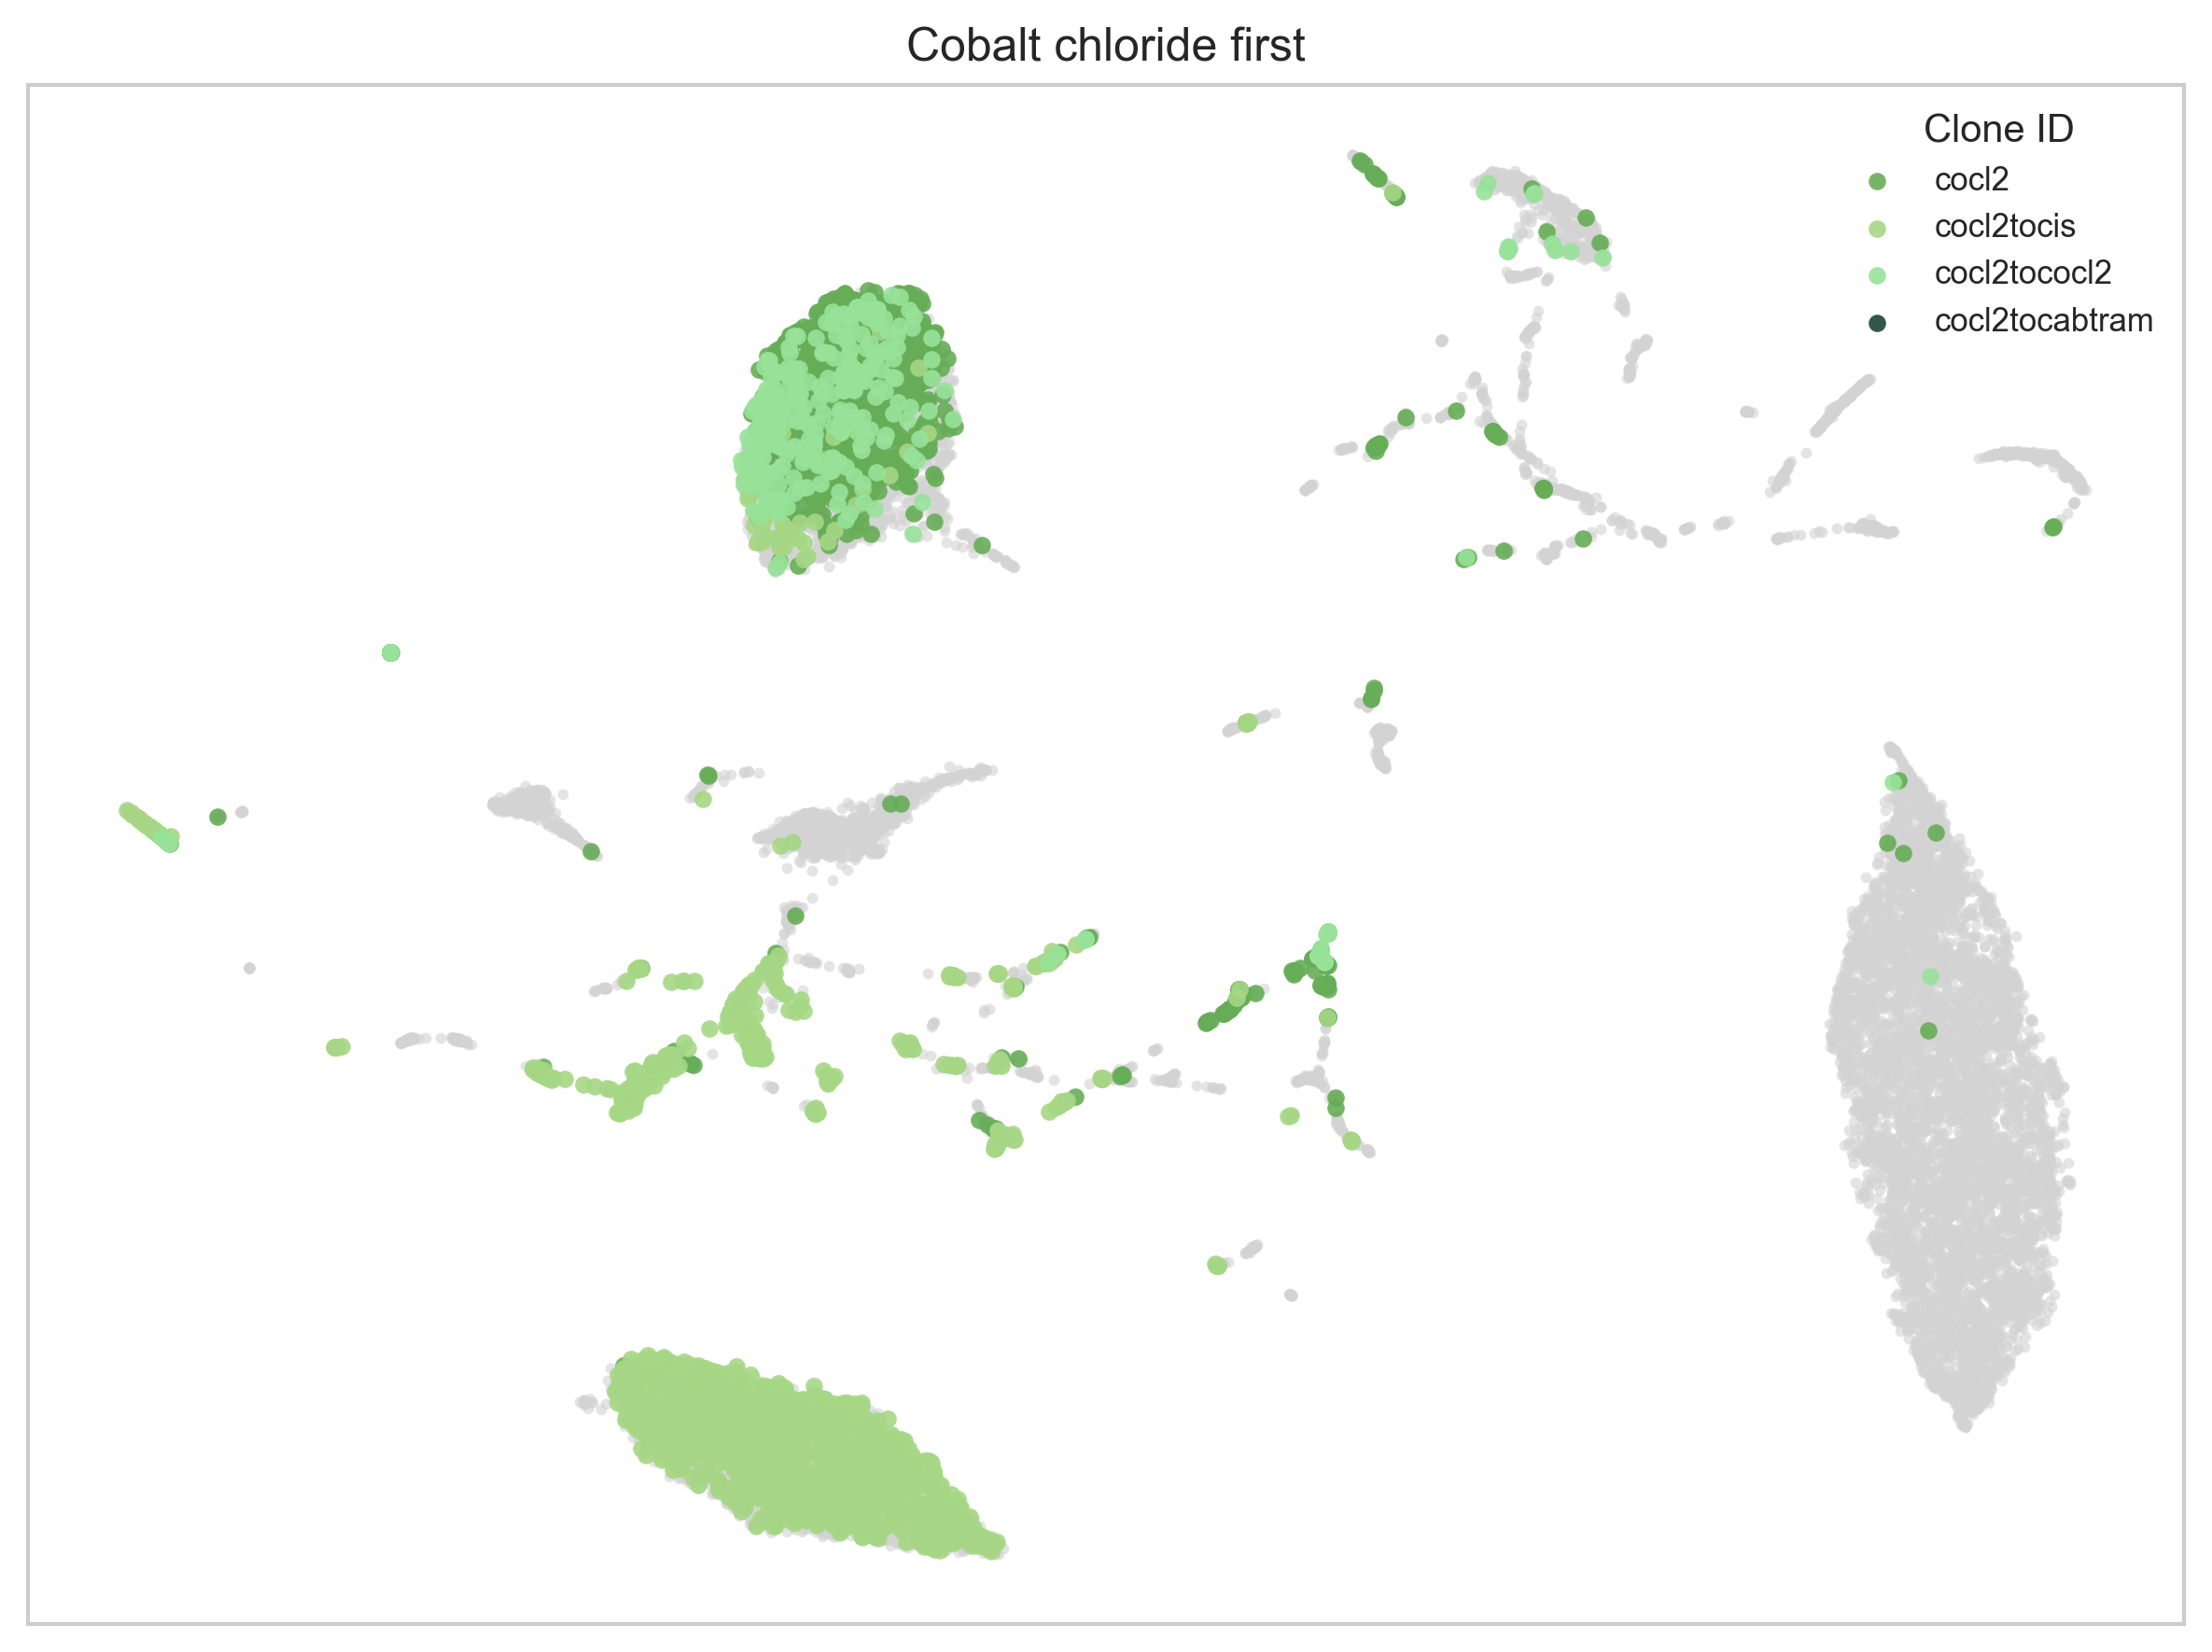

In [58]:

# 4) define the colors you want on top
color_map = {
    "cocl2":             "#67AD57",
    "cocl2tocis":        "#A6D785",
    "cocl2tococl2":      "#98E29A",
    "cocl2tocabtram":    "#1E4539",
}
default_color = "lightgray"

# 5) make boolean masks
is_grey    = [l not in color_map for l in labels]
is_colored = [l in color_map     for l in labels]

# 6) plot
plt.figure(figsize=(8,6), dpi=300)
plt.grid(False)
plt.xticks([]); plt.yticks([])
plt.title("Cobalt chloride first")

# 6a) grey background
plt.scatter(
    embedding_2d[is_grey,0],
    embedding_2d[is_grey,1],
    c=default_color,
    s=8,
    alpha=0.6,
    linewidth=0,
    label="_nolegend_"
)

# 6b) overlay each of your four lineages
for cid, col in color_map.items():
    mask = labels == cid
    plt.scatter(
        embedding_2d[mask,0],
        embedding_2d[mask,1],
        c=col,
        s=20,
        alpha=0.9,
        linewidth=0,
        label=cid
    )

# 7) legend
plt.legend(
    title="Clone ID",
    loc="upper right",
    frameon=False,
    fontsize="small"
)
plt.tight_layout()
plt.savefig("Cobalt_chloride_first.pdf", format="pdf", bbox_inches="tight")
plt.show()

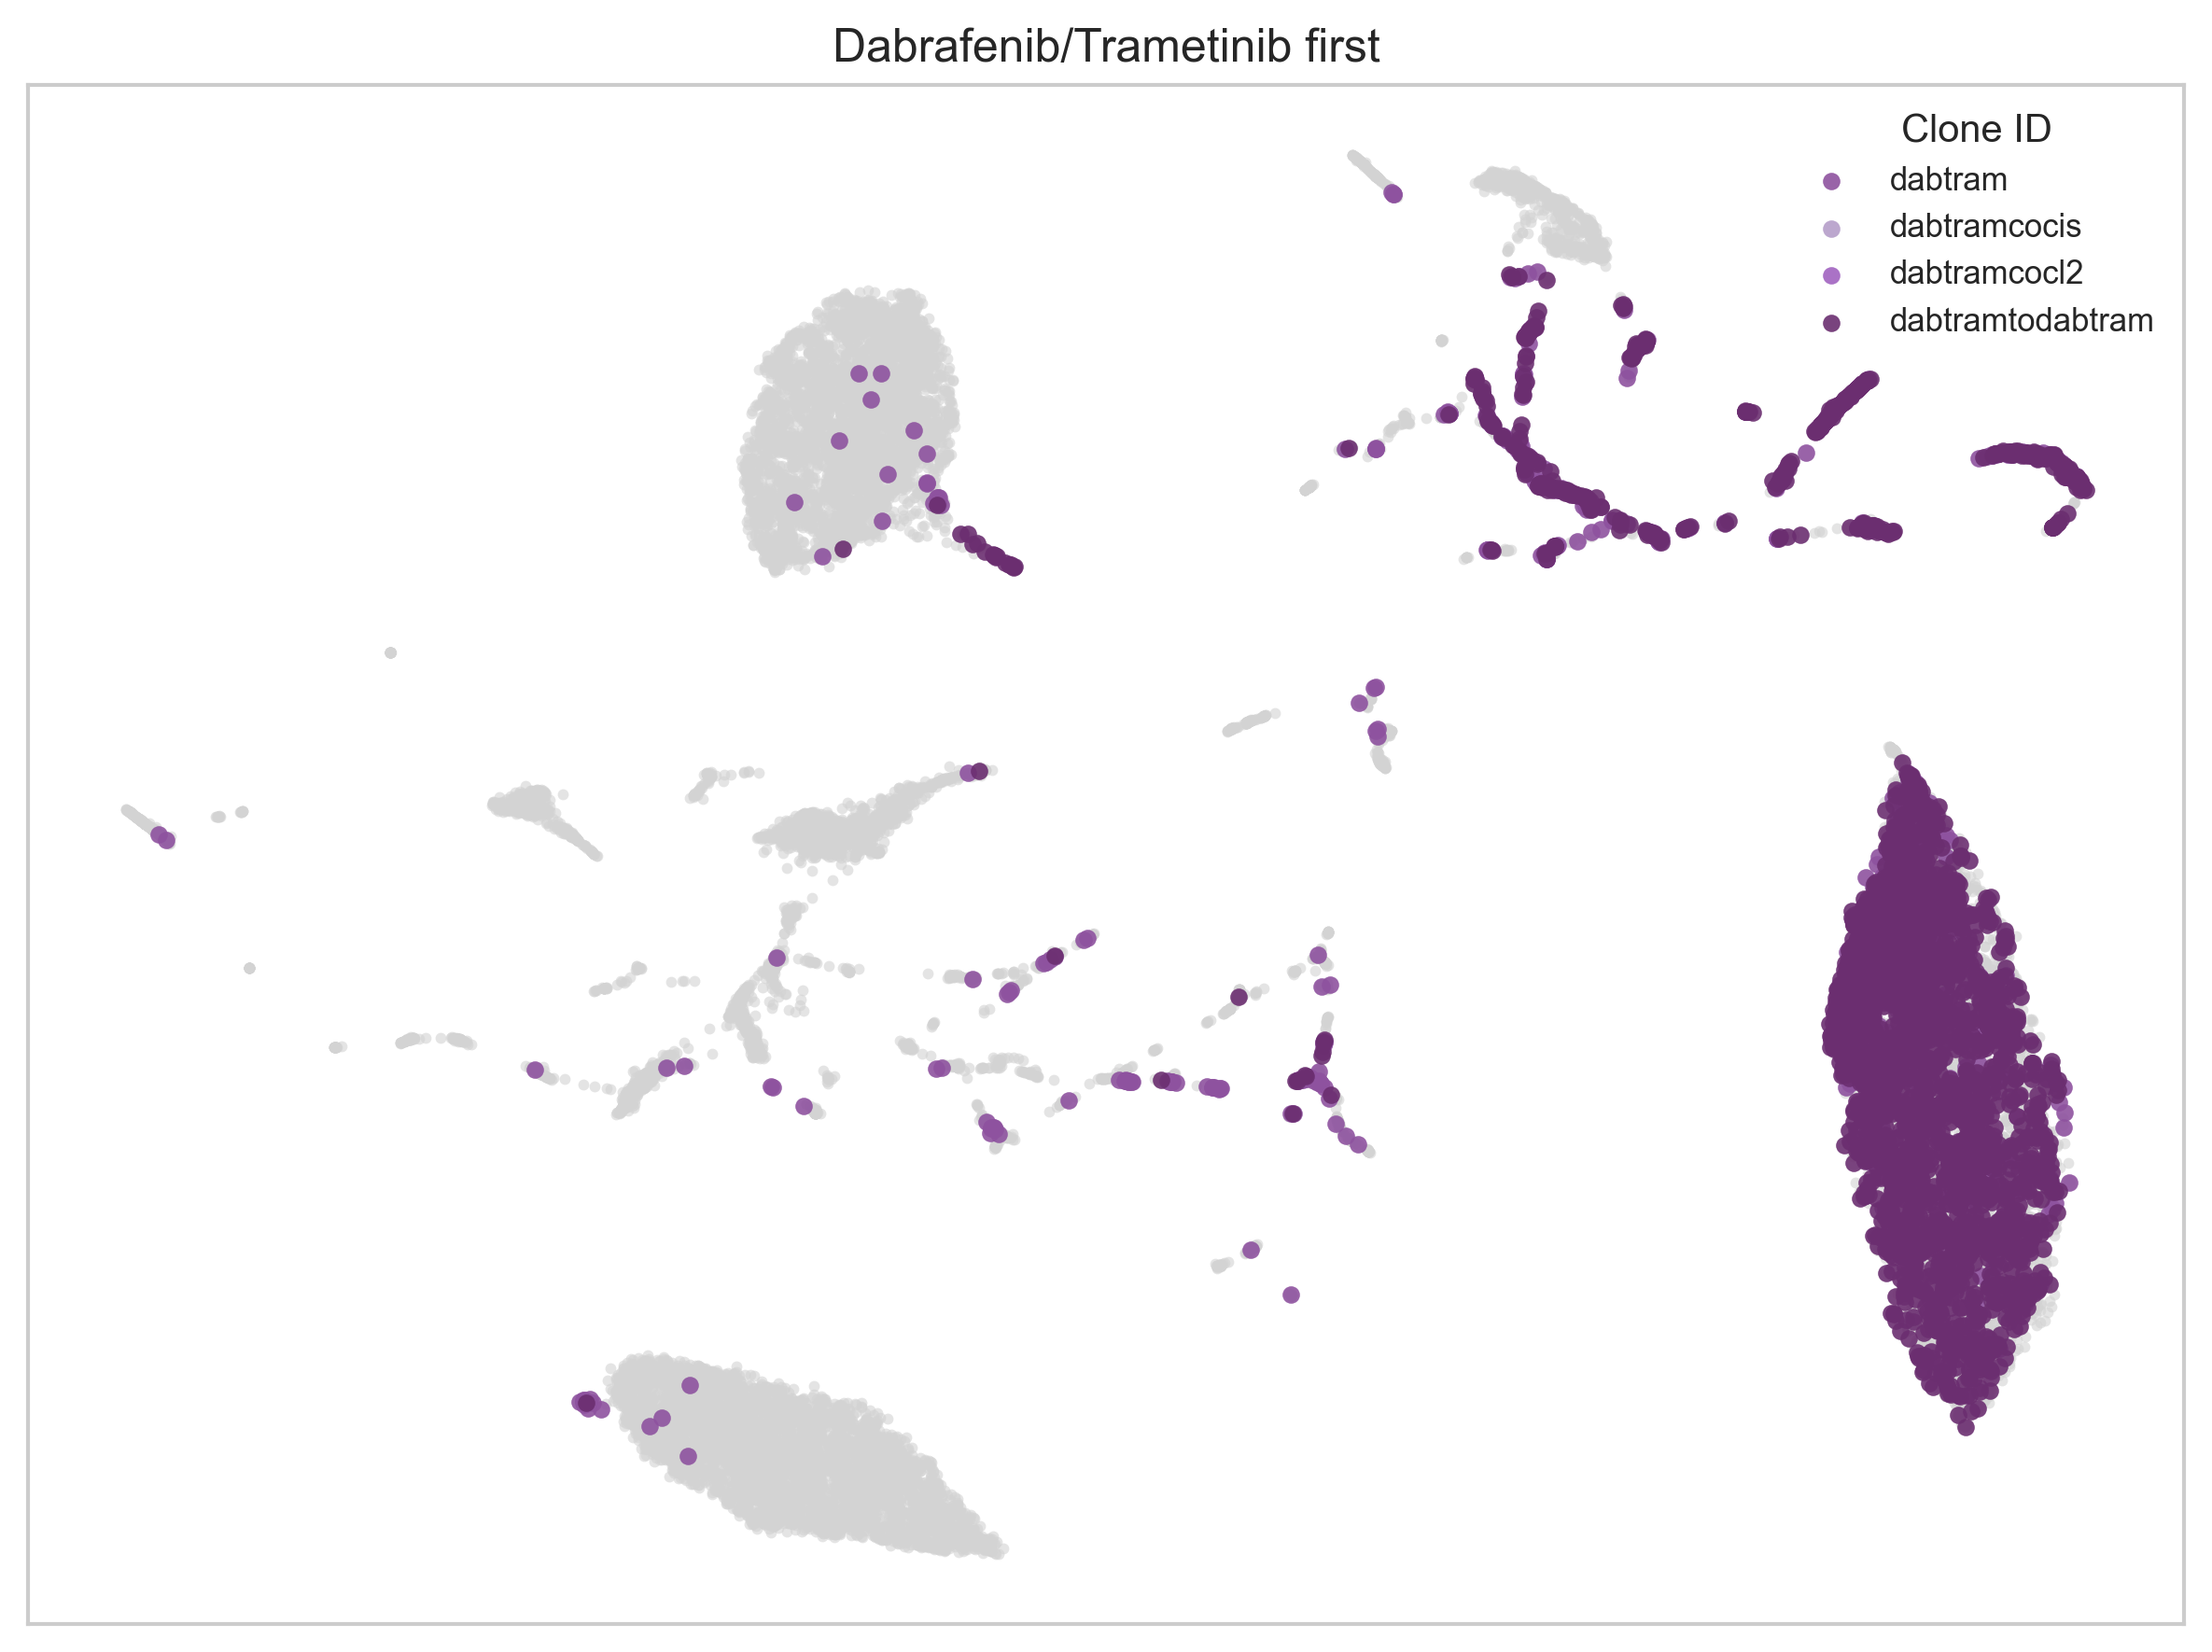

In [59]:

# 4) define the colors you want on top
color_map = {
    "dabtram":           "#8E529F",
    "dabtramcocis":      "#B59EC9",
    "dabtramcocl2":      "#A163C0",
    "dabtramtodabtram":  "#6B2E70",
}
default_color = "lightgray"

# 5) make boolean masks
is_grey    = [l not in color_map for l in labels]
is_colored = [l in color_map     for l in labels]

# 6) plot
plt.figure(figsize=(8,6), dpi=300)
plt.grid(False)
plt.xticks([]); plt.yticks([])
plt.title("Dabrafenib/Trametinib first")

# 6a) grey background
plt.scatter(
    embedding_2d[is_grey,0],
    embedding_2d[is_grey,1],
    c=default_color,
    s=8,
    alpha=0.6,
    linewidth=0,
    label="_nolegend_"
)

# 6b) overlay each of your four lineages
for cid, col in color_map.items():
    mask = labels == cid
    plt.scatter(
        embedding_2d[mask,0],
        embedding_2d[mask,1],
        c=col,
        s=20,
        alpha=0.9,
        linewidth=0,
        label=cid
    )

# 7) legend
plt.legend(
    title="Clone ID",
    loc="upper right",
    frameon=False,
    fontsize="small"
)
plt.tight_layout()
plt.savefig("Dabrafenib_Trametinib_first.pdf", format="pdf", bbox_inches="tight")
plt.show()

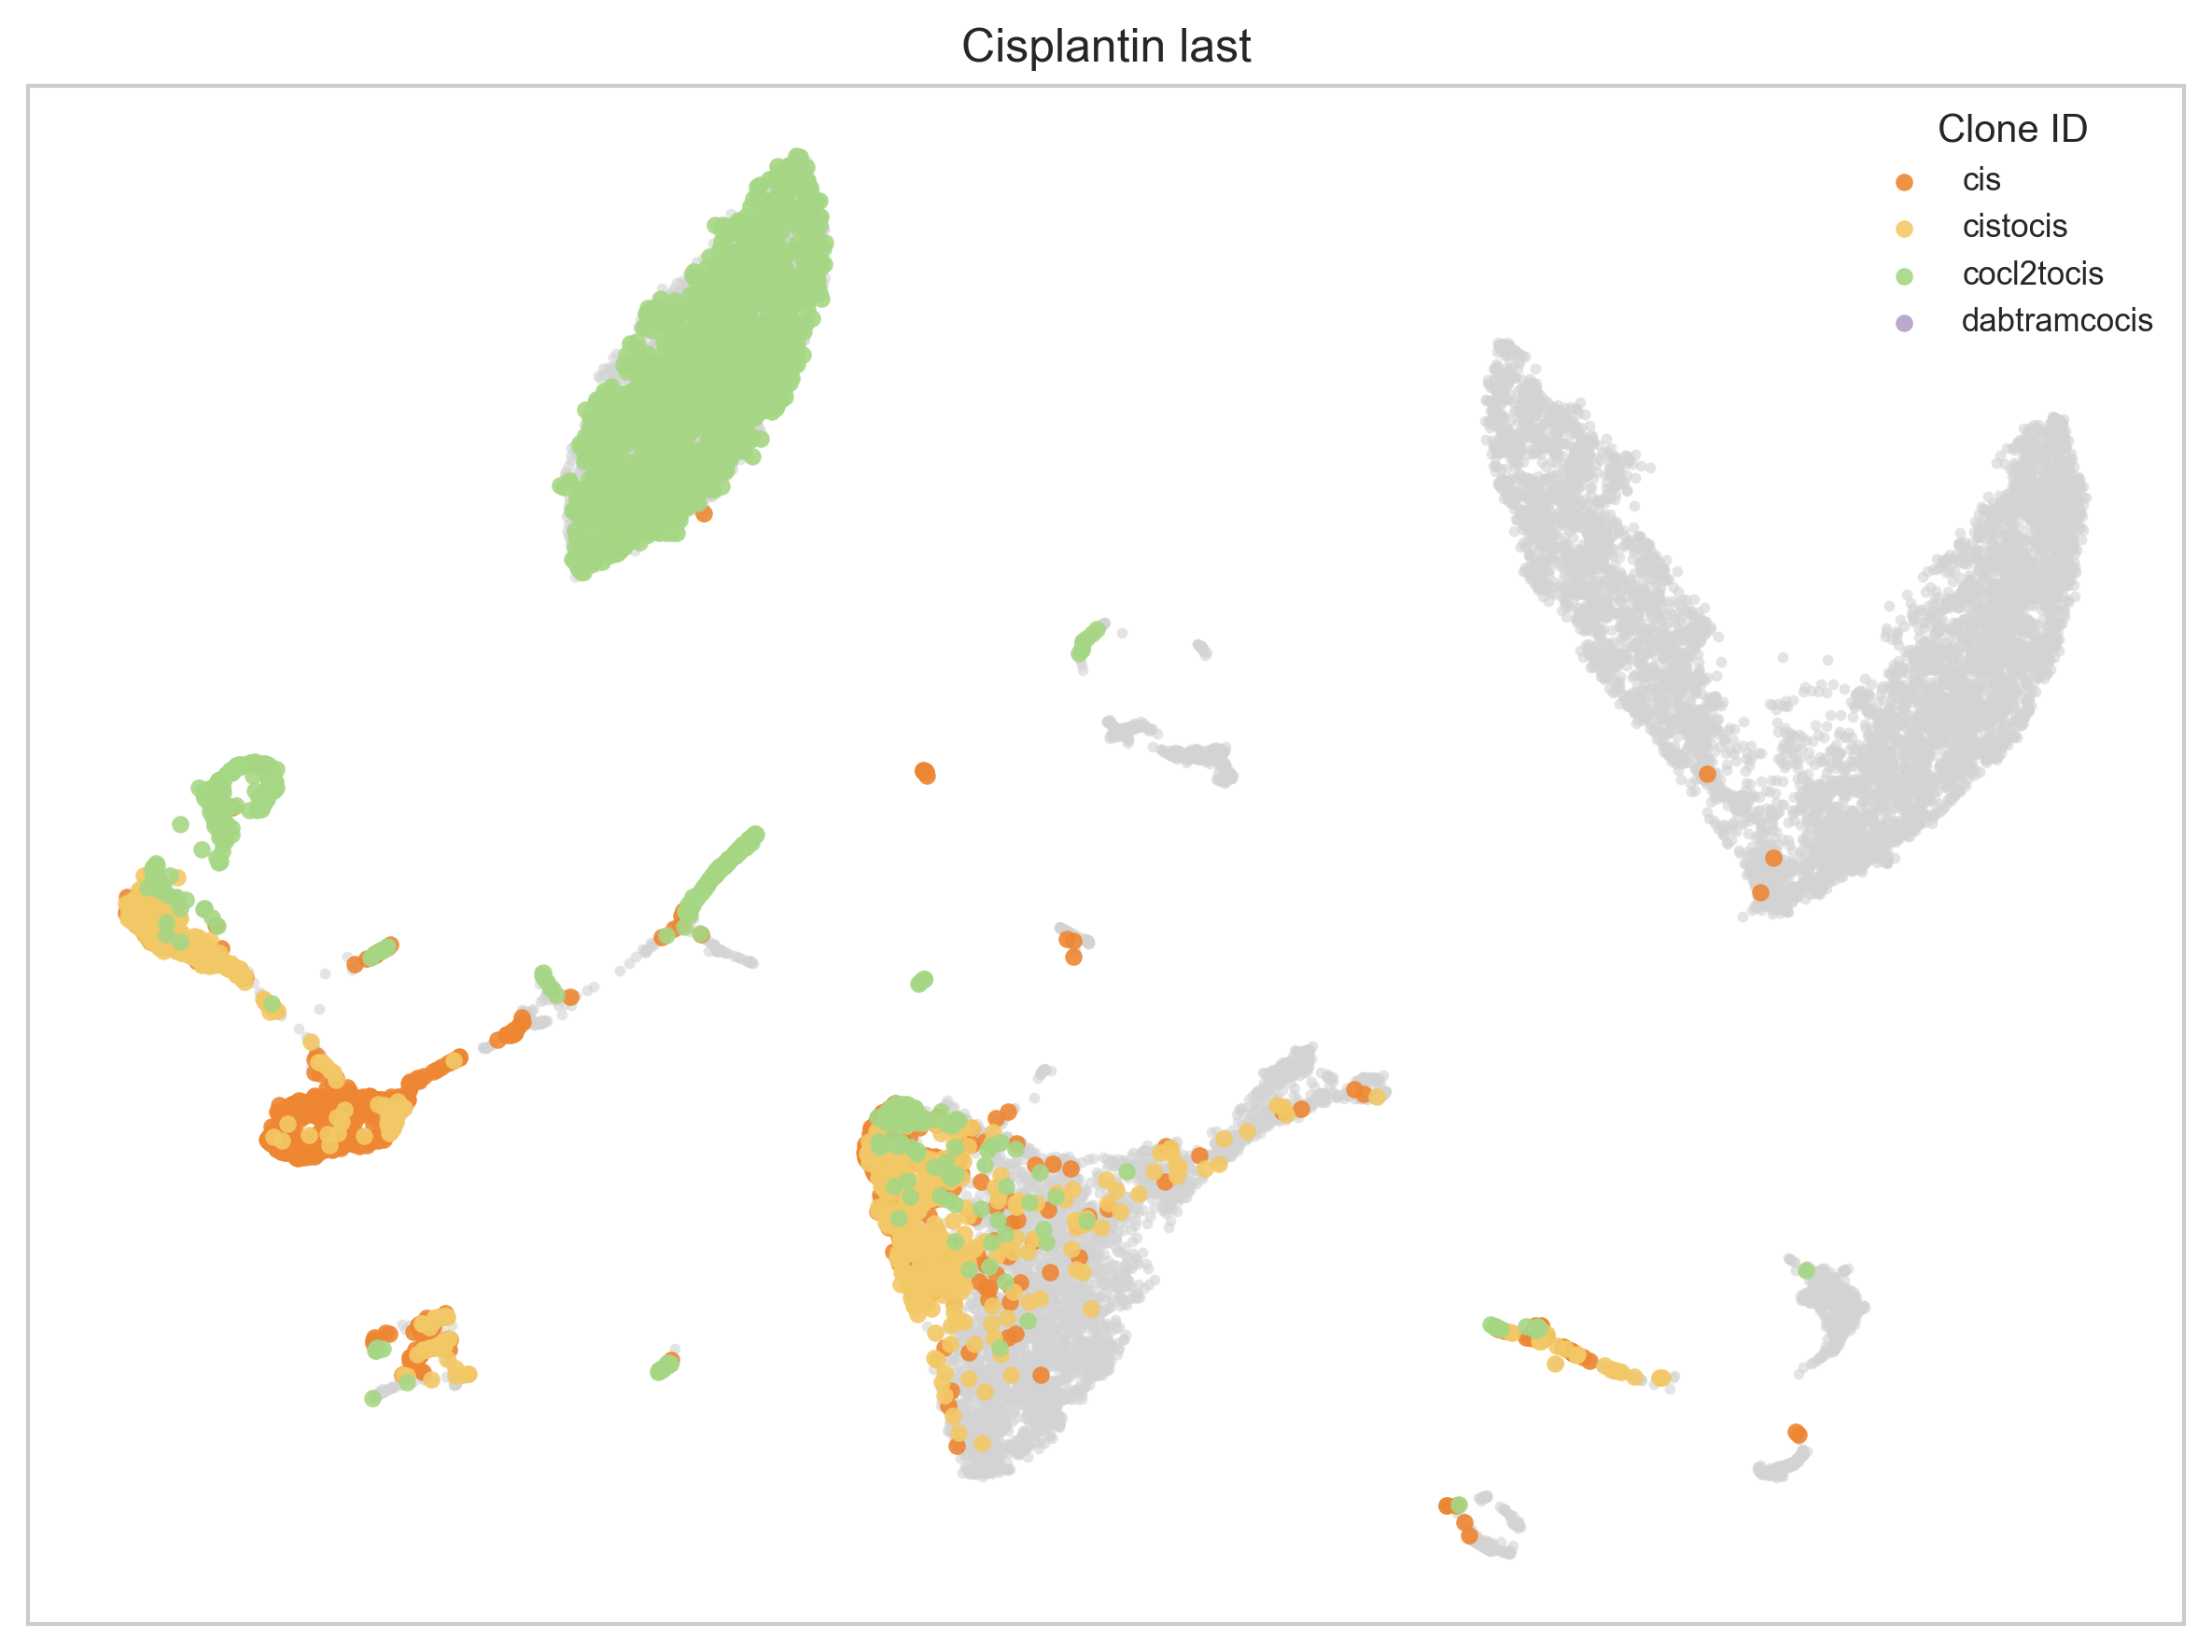

In [54]:

# 4) define the colors you want on top
color_map = {
    "cis":               "#EE8632",
    "cistocis":          "#F3C866",
    "cocl2tocis":        "#A6D785",
    "dabtramcocis":      "#B59EC9",
}


default_color = "lightgray"

# 5) make boolean masks
is_grey    = [l not in color_map for l in labels]
is_colored = [l in color_map     for l in labels]

# 6) plot
plt.figure(figsize=(8,6), dpi=300)
plt.grid(False)
plt.xticks([]); plt.yticks([])
plt.title("Cisplantin last")

# 6a) grey background
plt.scatter(
    embedding_2d[is_grey,0],
    embedding_2d[is_grey,1],
    c=default_color,
    s=8,
    alpha=0.6,
    linewidth=0,
    label="_nolegend_"
)

# 6b) overlay each of your four lineages
for cid, col in color_map.items():
    mask = labels == cid
    plt.scatter(
        embedding_2d[mask,0],
        embedding_2d[mask,1],
        c=col,
        s=20,
        alpha=0.9,
        linewidth=0,
        label=cid
    )

# 7) legend
plt.legend(
    title="Clone ID",
    loc="upper right",
    frameon=False,
    fontsize="small"
)
plt.tight_layout()
plt.savefig("Cisplantin_last.pdf", format="pdf", bbox_inches="tight")
plt.show()

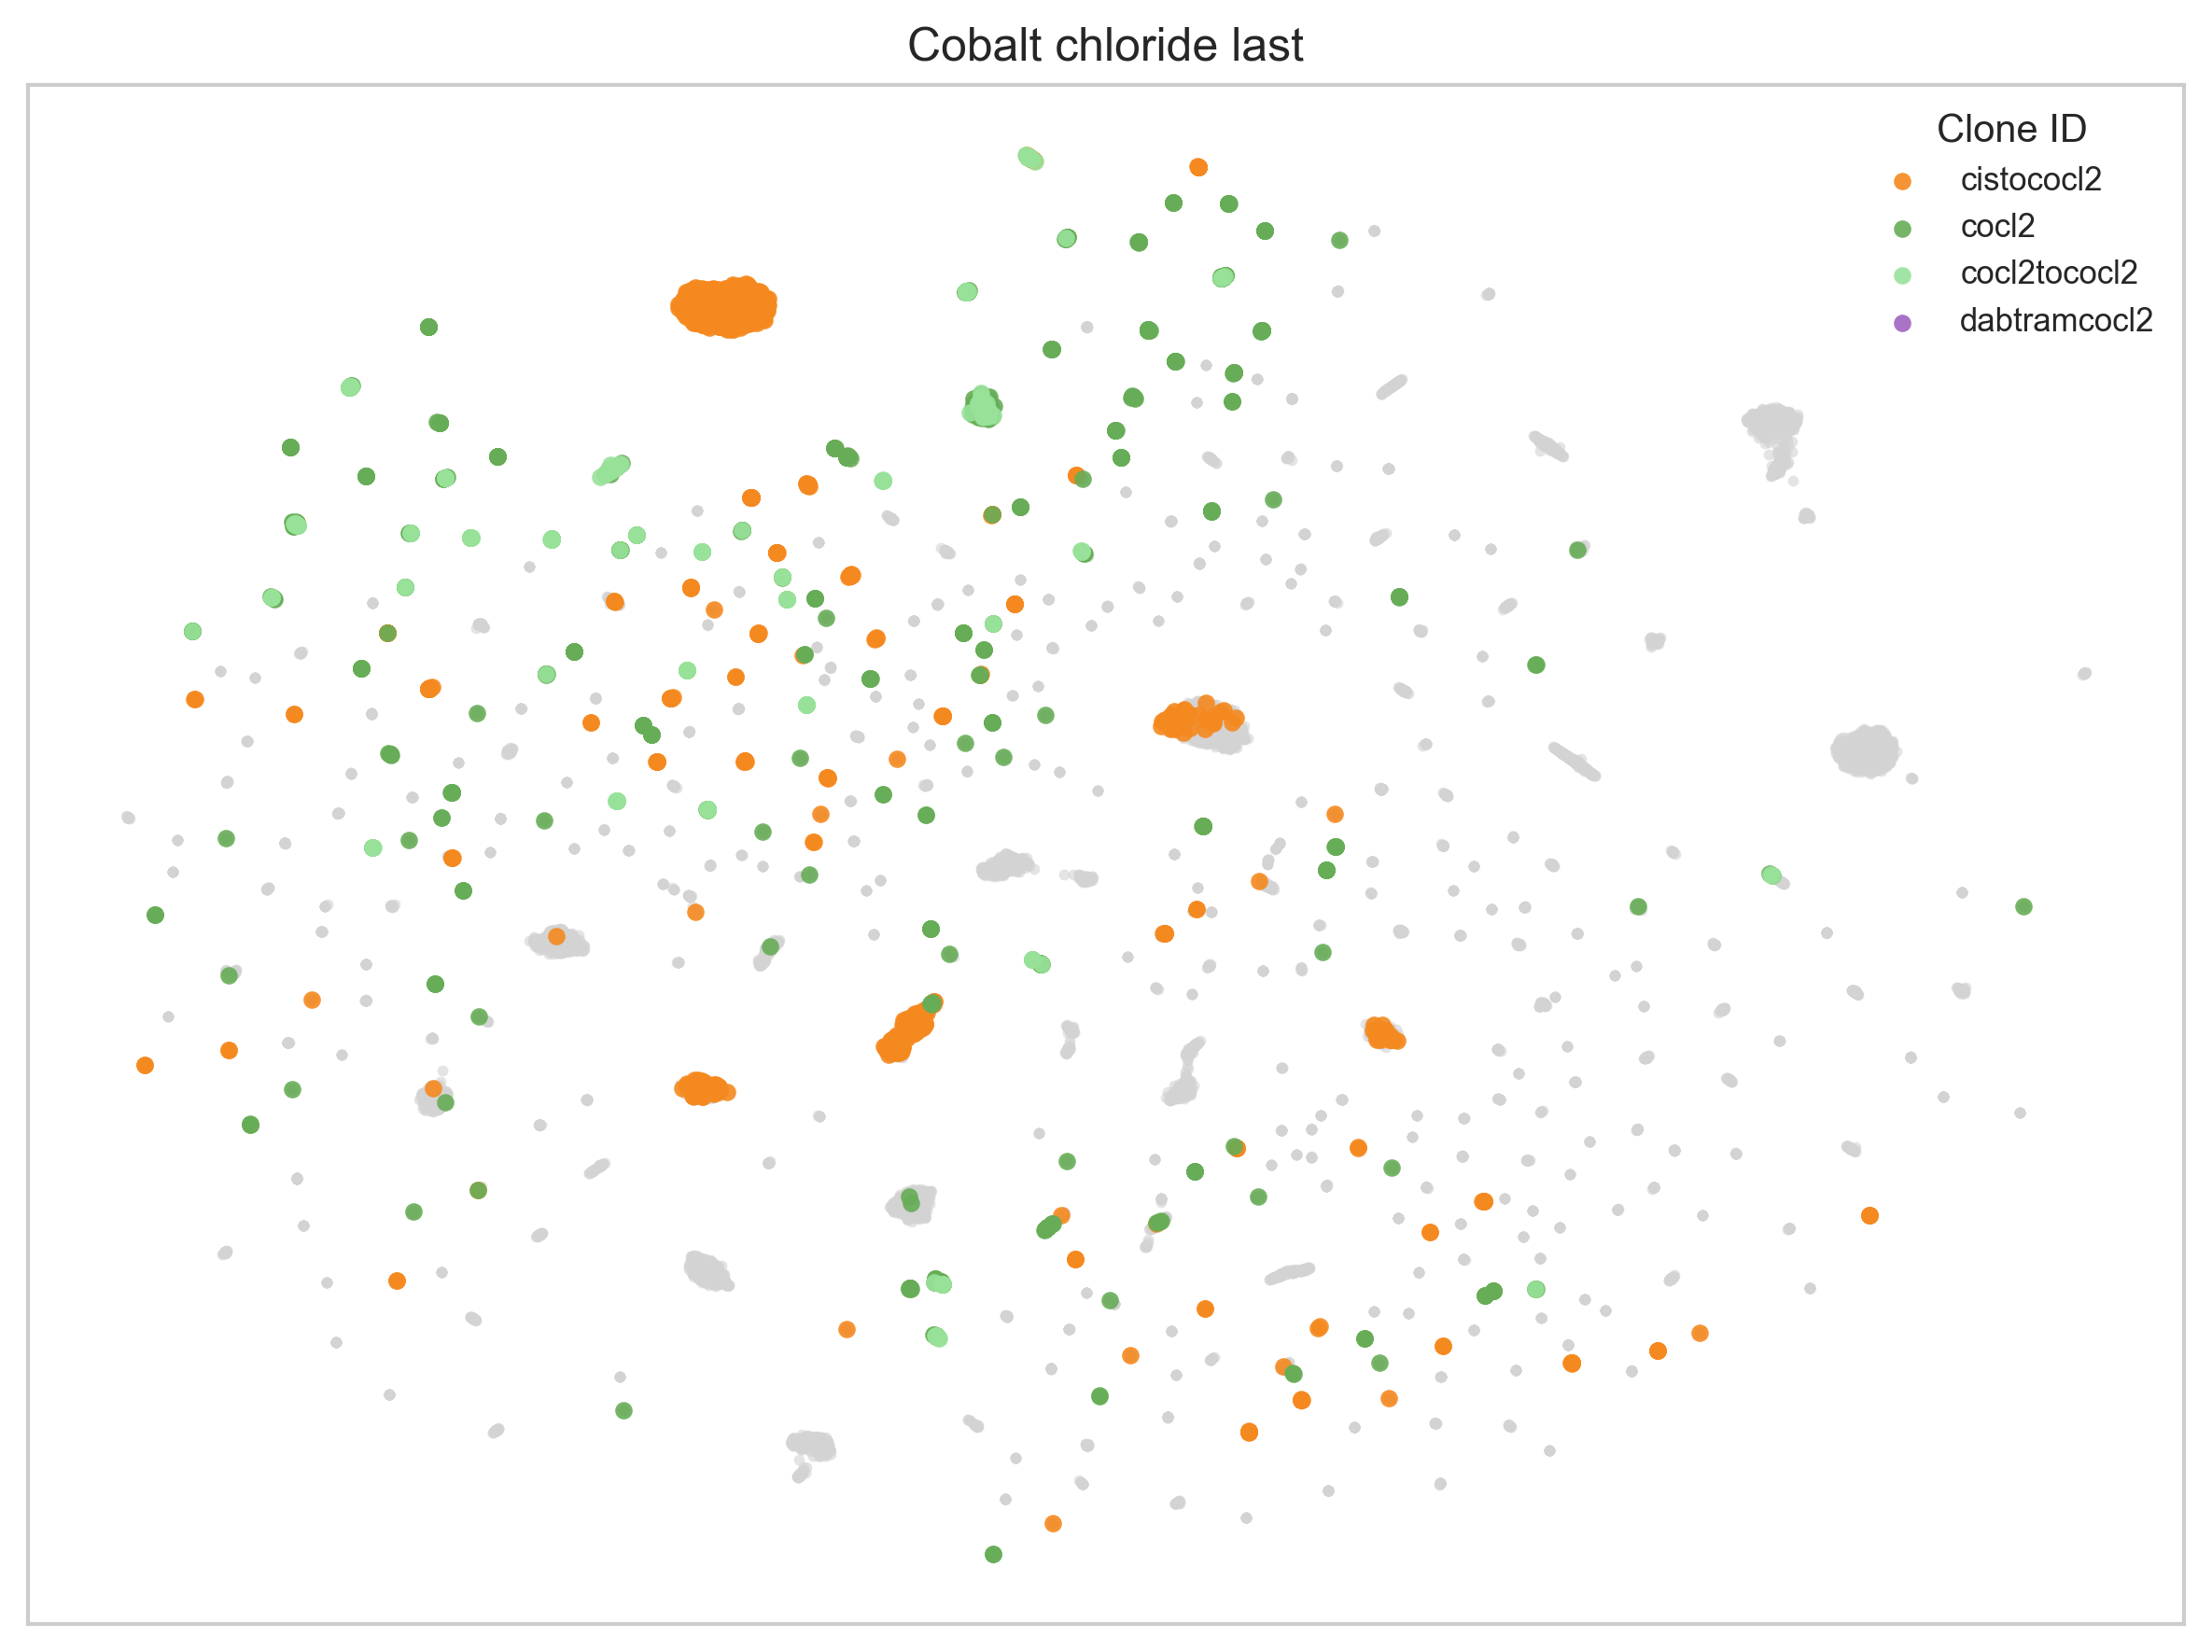

In [41]:

# 4) define the colors you want on top
color_map = {
    "cistococl2":        "#F5891F",
    "cocl2":             "#67AD57",
    "cocl2tococl2":      "#98E29A",
    "dabtramcocl2":      "#A163C0",
}

default_color = "lightgray"

# 5) make boolean masks
is_grey    = [l not in color_map for l in labels]
is_colored = [l in color_map     for l in labels]

# 6) plot
plt.figure(figsize=(8,6), dpi=300)
plt.grid(False)
plt.xticks([]); plt.yticks([])
plt.title("Cobalt chloride last")

# 6a) grey background
plt.scatter(
    embedding_2d[is_grey,0],
    embedding_2d[is_grey,1],
    c=default_color,
    s=8,
    alpha=0.6,
    linewidth=0,
    label="_nolegend_"
)

# 6b) overlay each of your four lineages
for cid, col in color_map.items():
    mask = labels == cid
    plt.scatter(
        embedding_2d[mask,0],
        embedding_2d[mask,1],
        c=col,
        s=20,
        alpha=0.9,
        linewidth=0,
        label=cid
    )

# 7) legend
plt.legend(
    title="Clone ID",
    loc="upper right",
    frameon=False,
    fontsize="small"
)
plt.tight_layout()
plt.savefig("Cobalt_chloride_last.pdf", format="pdf", bbox_inches="tight")
plt.show()

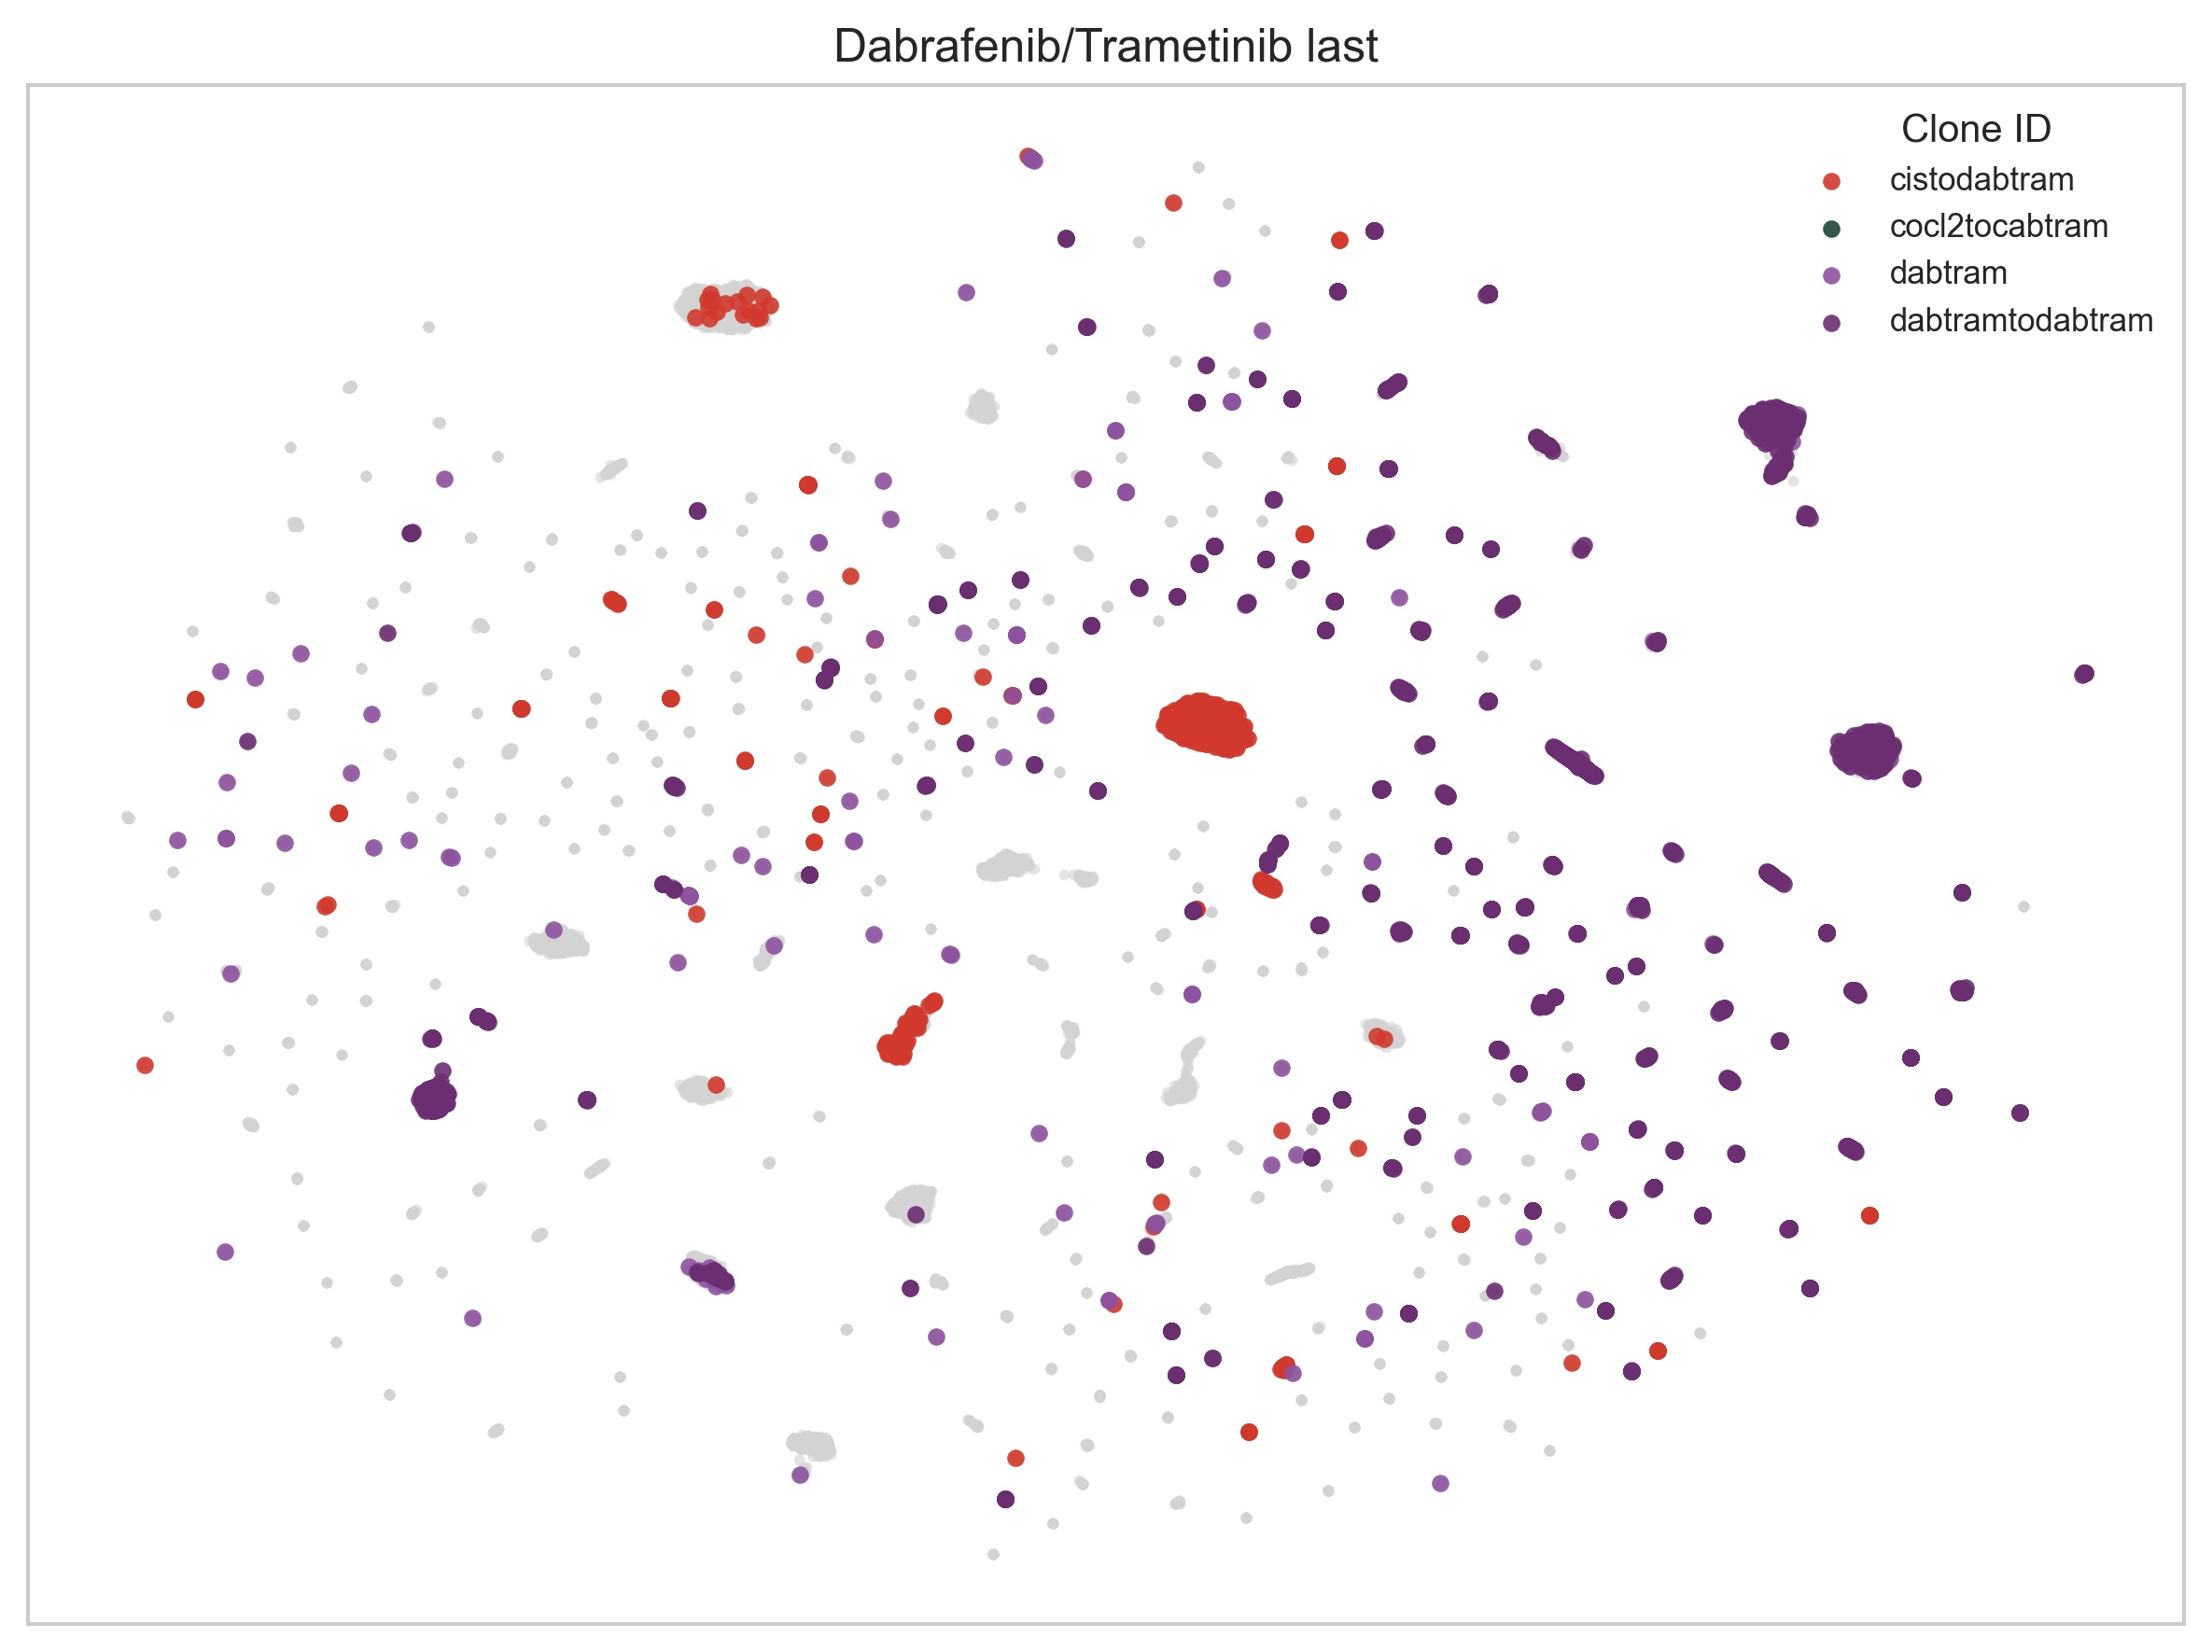

In [42]:

# 4) define the colors you want on top
color_map = {
    "cistodabtram":      "#D1392C",
    "cocl2tocabtram":    "#1E4539",
    "dabtram":           "#8E529F",
    "dabtramtodabtram":  "#6B2E70",
}


default_color = "lightgray"

# 5) make boolean masks
is_grey    = [l not in color_map for l in labels]
is_colored = [l in color_map     for l in labels]

# 6) plot
plt.figure(figsize=(8,6), dpi=300)
plt.grid(False)
plt.xticks([]); plt.yticks([])
plt.title("Dabrafenib/Trametinib last")

# 6a) grey background
plt.scatter(
    embedding_2d[is_grey,0],
    embedding_2d[is_grey,1],
    c=default_color,
    s=8,
    alpha=0.6,
    linewidth=0,
    label="_nolegend_"
)

# 6b) overlay each of your four lineages
for cid, col in color_map.items():
    mask = labels == cid
    plt.scatter(
        embedding_2d[mask,0],
        embedding_2d[mask,1],
        c=col,
        s=20,
        alpha=0.9,
        linewidth=0,
        label=cid
    )

# 7) legend
plt.legend(
    title="Clone ID",
    loc="upper right",
    frameon=False,
    fontsize="small"
)
plt.tight_layout()
plt.savefig("Dabrafenib_Trametinib_last.pdf", format="pdf", bbox_inches="tight")
plt.show()

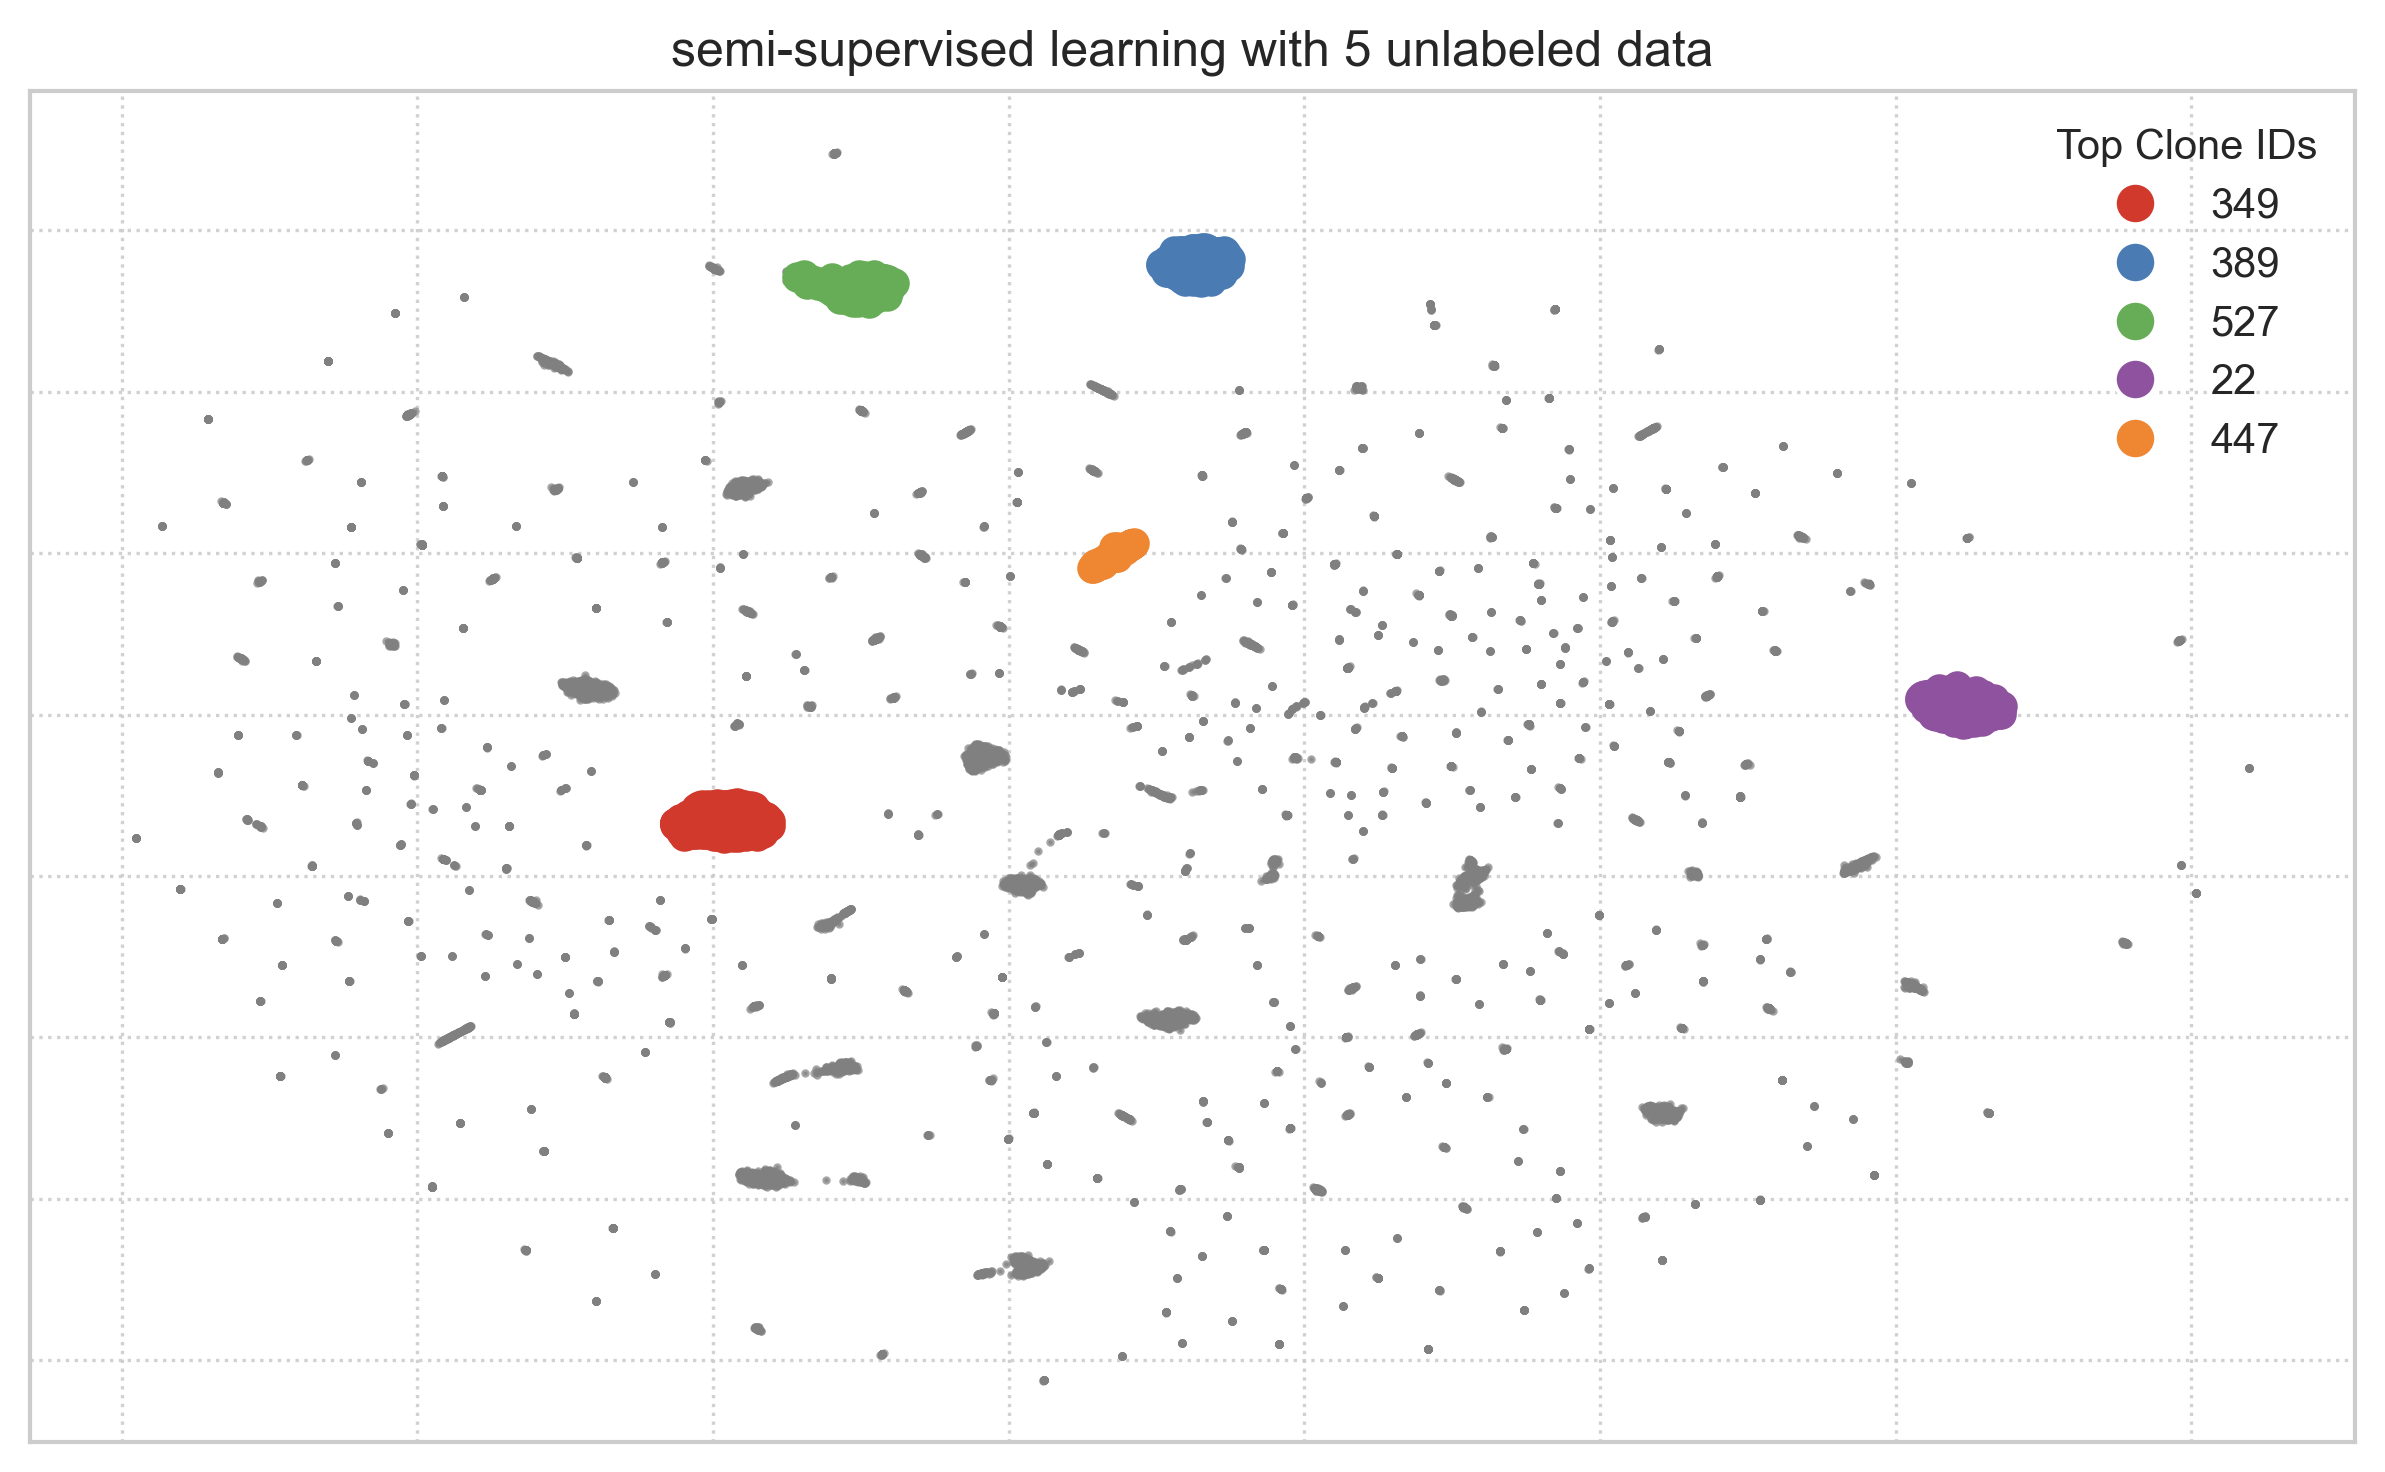

In [45]:
ev.plot_umap_top_lin("semi-supervised learning with 5 unlabeled data")

/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_84474/3768573549.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=methods, y=values, palette=[palette[m] for m in methods])


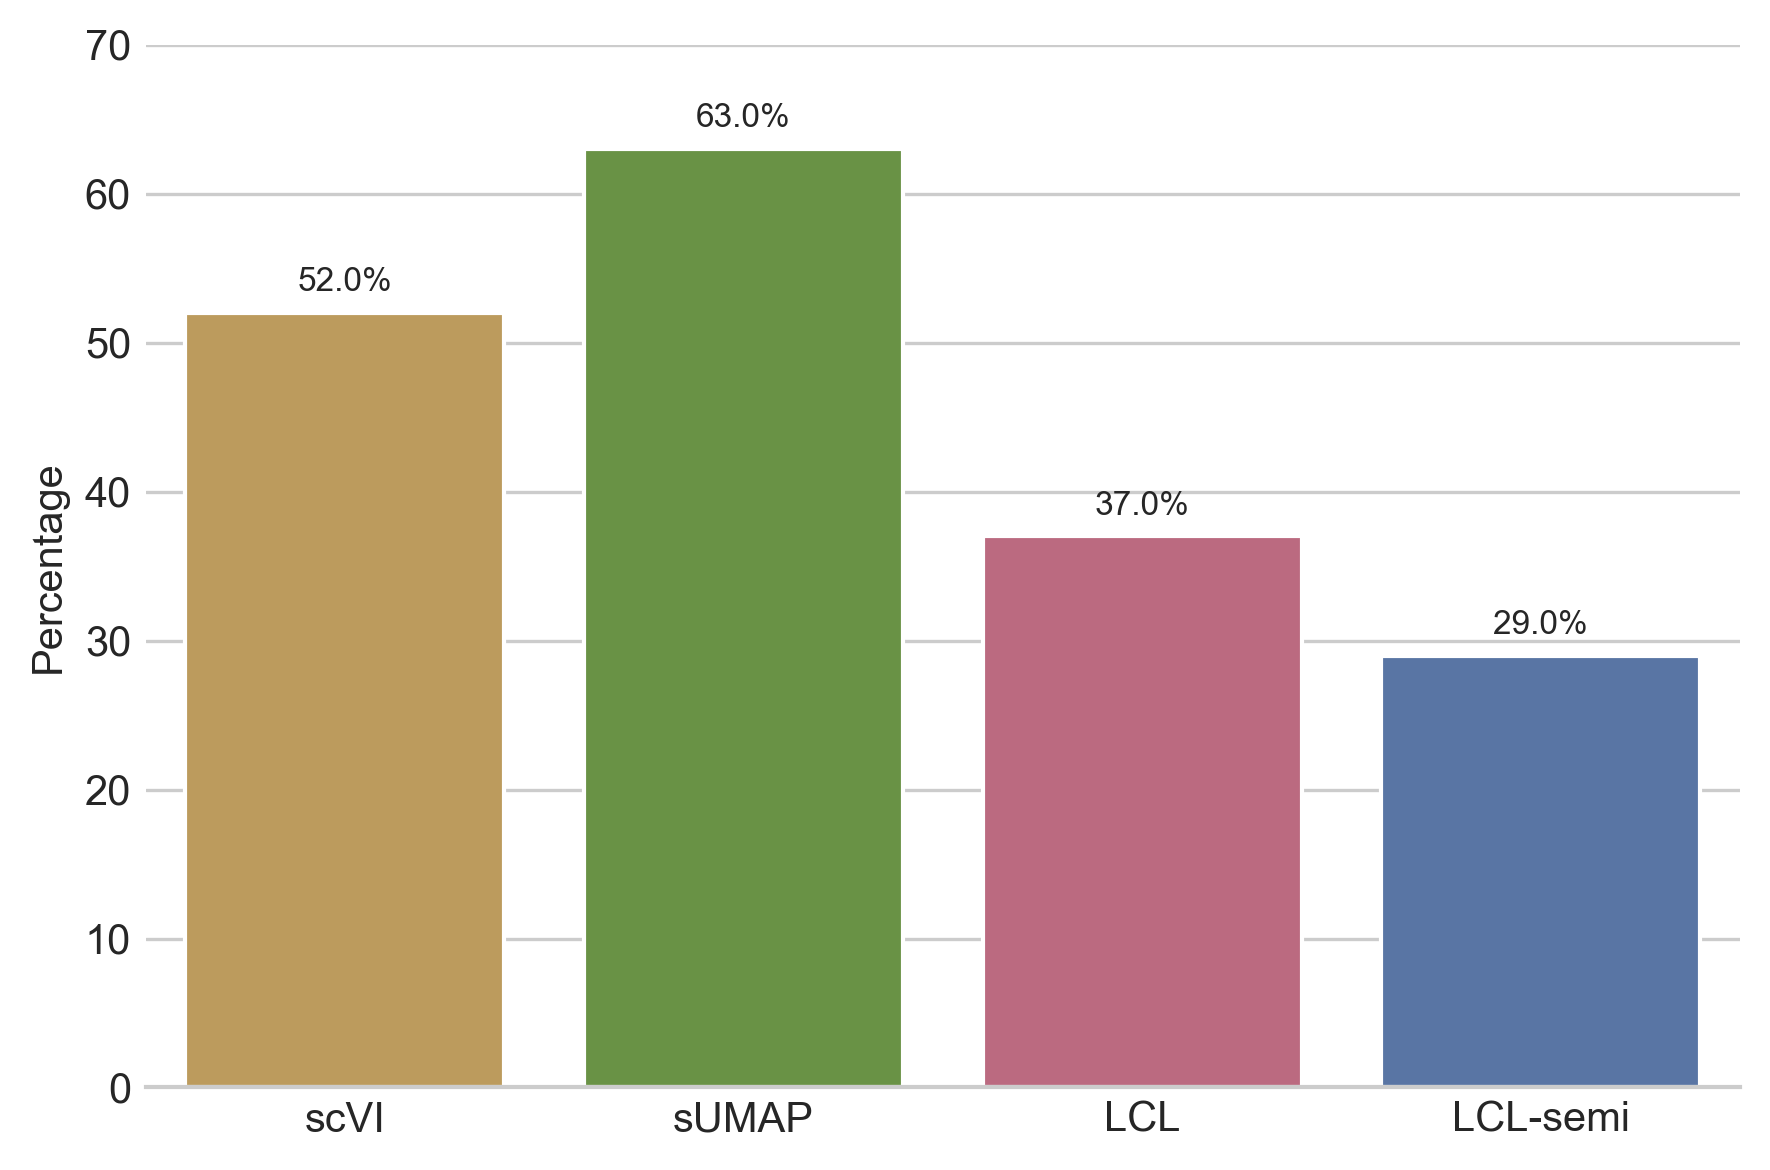

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define your methods (x) and their values
methods = ['scVI', 'sUMAP', 'LCL', 'LCL-semi']
values  = [52,      63,       37,    29]

# 2. Pick a custom color for each bar
palette = {
    'scVI':      '#CCA04D',
    'sUMAP':     '#689F38',
    'LCL':       '#C85C7A',
    'LCL-semi':  '#4C72B0',
}

# 3. Plot at high resolution (300 dpi)
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=300)

ax = sns.barplot(x=methods, y=values, palette=[palette[m] for m in methods])

# 4. Aesthetics
ax.set_ylim(0, 70)
ax.set_ylabel("Percentage")
ax.set_yticks(range(0, 71, 10))
ax.set_xlabel("")   # no x-axis label
sns.despine(left=True)

# 5. Annotate each bar with its value
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{h}%", 
                (p.get_x() + p.get_width()/2, h + 1),
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# 6. Save at high dpi
plt.savefig("barplot_highres.png", dpi=300, bbox_inches="tight")
# —or as vector PDF:
plt.savefig("barplot_highres.pdf", bbox_inches="tight")

plt.show()

/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_84474/1223237884.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


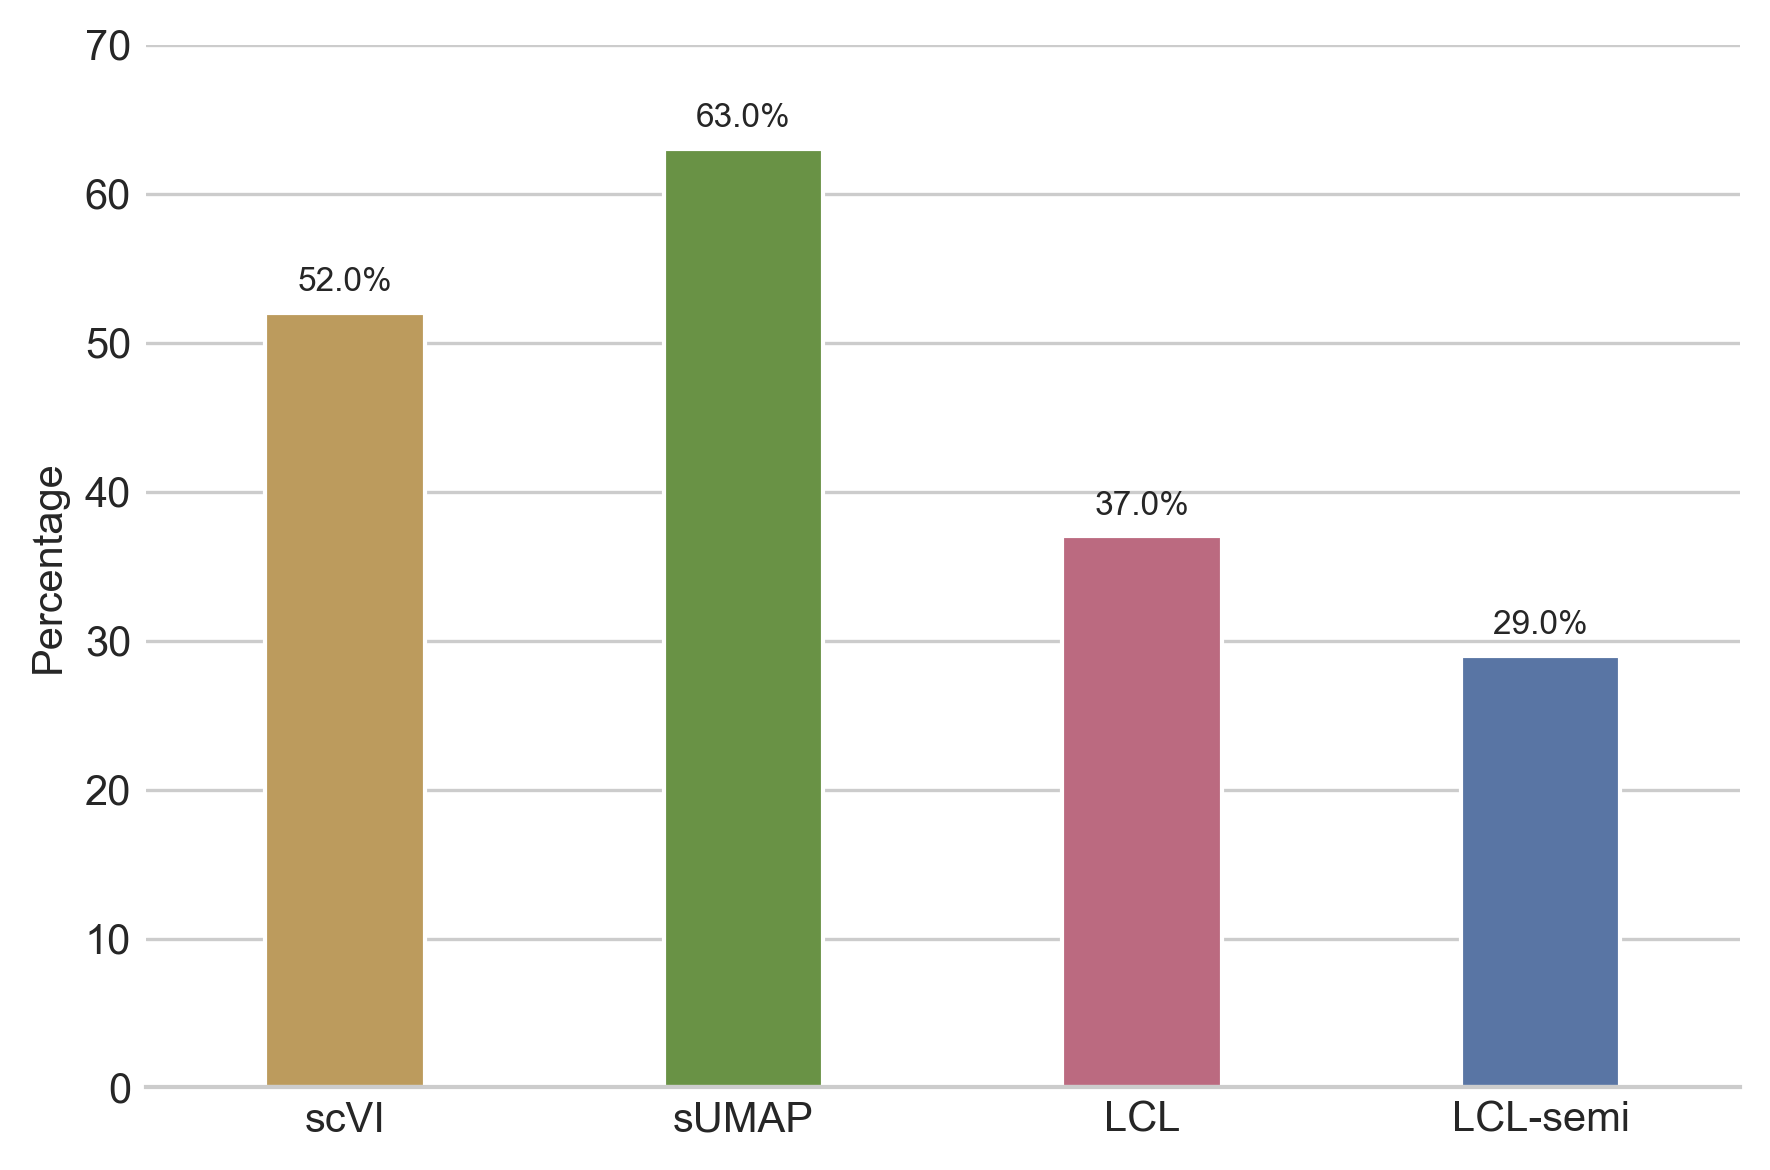

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
methods = ['scVI', 'sUMAP', 'LCL', 'LCL-semi']
values  = [52,      63,       37,    29]

# Colors
palette = {
    'scVI':      '#CCA04D',
    'sUMAP':     '#689F38',
    'LCL':       '#C85C7A',
    'LCL-semi':  '#4C72B0',
}

# High-res figure
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=300)

# Thinner bars via `width`
ax = sns.barplot(
    x=methods, 
    y=values, 
    palette=[palette[m] for m in methods],
    width=0.4               # <-- make bars 40% of the step width
)

# Aesthetics
ax.set_ylim(0, 70)
ax.set_ylabel("Percentage")
ax.set_yticks(range(0, 71, 10))
ax.set_xlabel("")
sns.despine(left=True)

# Annotations
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{h}%", 
                (p.get_x() + p.get_width()/2, h + 1),
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Save outputs
plt.savefig("barplot_thin_bars.png", dpi=300, bbox_inches="tight")
plt.savefig("barplot_thin_bars.pdf", bbox_inches="tight")

plt.show()